In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel_file = pd.ExcelFile('C:/Users/Acer/Downloads/用电数据 (2).xlsx')

# 获取指定工作表中的数据，设置表头行为1
df = excel_file.parse('趋势曲线-2025-06-01 000000-2025-07-', header=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间      590 non-null    object 
 1   正向有功电能  589 non-null    float64
 2   A相电流    588 non-null    float64
 3   B相电流    589 non-null    float64
 4   C相电流    588 non-null    float64
 5   A相有功功率  588 non-null    float64
 6   B相有功功率  588 non-null    float64
 7   C相有功功率  588 non-null    float64
 8   视在功率    589 non-null    float64
dtypes: float64(8), object(1)
memory usage: 41.6+ KB


### 缺失值处理

In [4]:
missing_values = df.isnull().sum()
print("每列的缺失值数量：")
print(missing_values)

每列的缺失值数量：
时间        0
正向有功电能    1
A相电流      2
B相电流      1
C相电流      2
A相有功功率    2
B相有功功率    2
C相有功功率    2
视在功率      1
dtype: int64


In [5]:
# 删除含有缺失值的行
df = df.dropna()

# 将结果保存为新的 Excel 文件
new_file_path = 'C:/lsx/用电数据 (2)_删除缺失值.xlsx'
df.to_excel(new_file_path, index=False)

In [6]:
values = df.isnull().sum()
print("每列的缺失值数量：")
print(values)

每列的缺失值数量：
时间        0
正向有功电能    0
A相电流      0
B相电流      0
C相电流      0
A相有功功率    0
B相有功功率    0
C相有功功率    0
视在功率      0
dtype: int64


In [7]:
sheet_names = excel_file.sheet_names
sheet_names

['趋势曲线-2025-06-01 000000-2025-07-']

In [8]:
print('数据基本信息：')
df.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 589
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   时间      577 non-null    object 
 1   正向有功电能  577 non-null    float64
 2   A相电流    577 non-null    float64
 3   B相电流    577 non-null    float64
 4   C相电流    577 non-null    float64
 5   A相有功功率  577 non-null    float64
 6   B相有功功率  577 non-null    float64
 7   C相有功功率  577 non-null    float64
 8   视在功率    577 non-null    float64
dtypes: float64(8), object(1)
memory usage: 45.1+ KB


In [9]:
df.head()

,时间,正向有功电能,A相电流,B相电流,C相电流,A相有功功率,B相有功功率,C相有功功率,视在功率
0,2025-06-01 00:00:00,9215940.0,426.24,445.57,561.91,95.46,99.93,126.97,330.36
1,2025-06-01 01:00:00,9216270.0,393.85,447.48,535.16,88.51,100.62,121.57,320.59
2,2025-06-01 02:00:00,9216579.0,373.90,419.10,519.39,84.60,95.11,118.83,306.91
3,2025-06-01 03:00:00,9216908.0,423.06,480.36,601.83,94.36,107.21,135.10,353.00
4,2025-06-01 04:00:00,9217232.0,390.27,463.63,555.34,87.63,104.43,125.72,331.83


In [10]:
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

一天 24 小时的聚类结果：


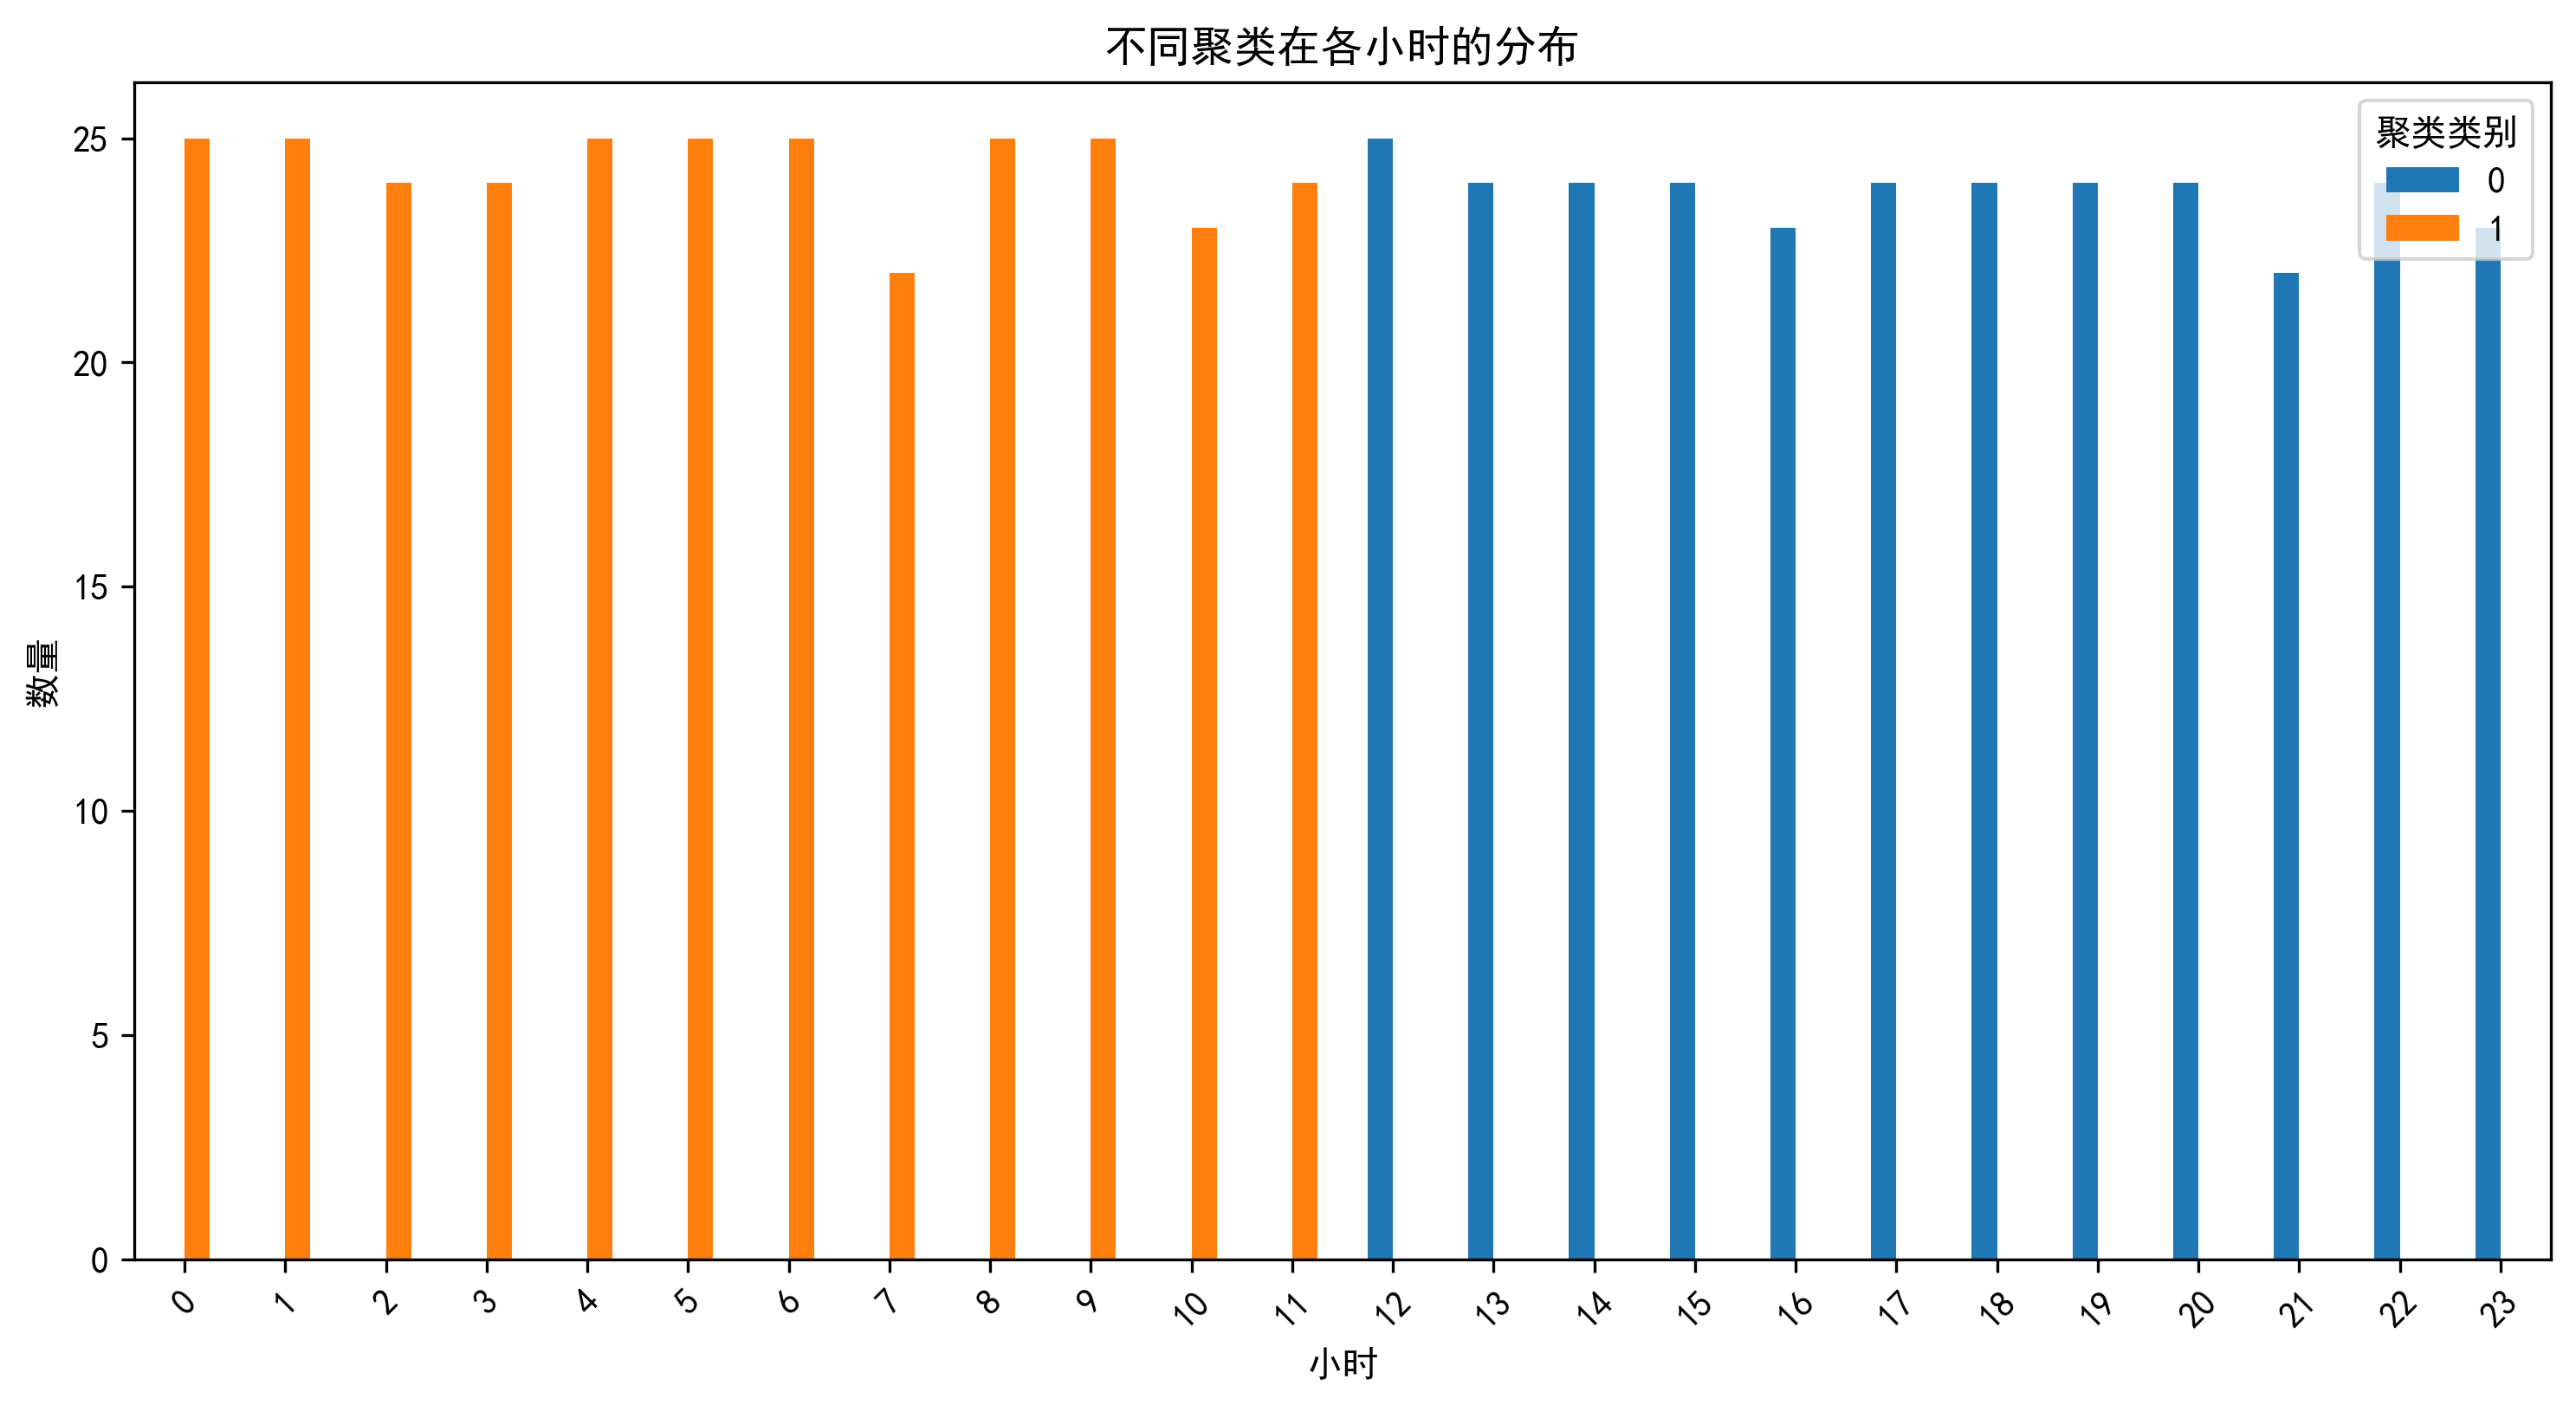

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 提取小时信息
df['小时'] = pd.to_datetime(df['时间']).dt.hour

# 选取参与聚类的特征
features = ['正向有功电能', 'A相电流', 'B相电流', 'C相电流', 'A相有功功率', 'B相有功功率', 'C相有功功率', '视在功率']

# 寻找最优的簇数量（这里简单设定范围为 2 到 10）
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    labels = kmeans.labels_
    score = silhouette_score(df[features], labels)
    silhouette_scores.append(score)

# 获取最优簇数量
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

# 提取小时数据并进行聚类
hour_data = df[['小时']]
kmeans_hour = KMeans(n_clusters=best_k, random_state=42)
df['小时聚类'] = kmeans_hour.fit_predict(hour_data)

# 输出聚类结果
print('一天 24 小时的聚类结果：')
df_1=df[['小时', '小时聚类']]

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300



# 绘制不同聚类在各小时的分布柱状图
hourly_pattern = df.groupby(['小时', '小时聚类']).size().unstack(fill_value=0)
hourly_pattern.plot(kind='bar', figsize=(12, 6))
plt.title('不同聚类在各小时的分布')
plt.xlabel('小时')
plt.xticks(rotation=45)
plt.ylabel('数量')
plt.legend(title='聚类类别')
plt.show()

柱状图分析
聚类类别分布：

类别0（蓝色）：主要分布在12点、15-20点，以及部分其他时段（如14点、21点）。
类别1（橙色）：覆盖了大部分非类别0的时段，尤其是0-7点、8点、10-11点等。

时间分布规律：
类别0：可能代表用电高峰时段（如白天工作时段或晚间生活用电高峰）。
类别1：可能代表用电低谷时段（如深夜或清晨）。

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 589
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   小时      577 non-null    int64
 1   小时聚类    577 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 11.3 KB


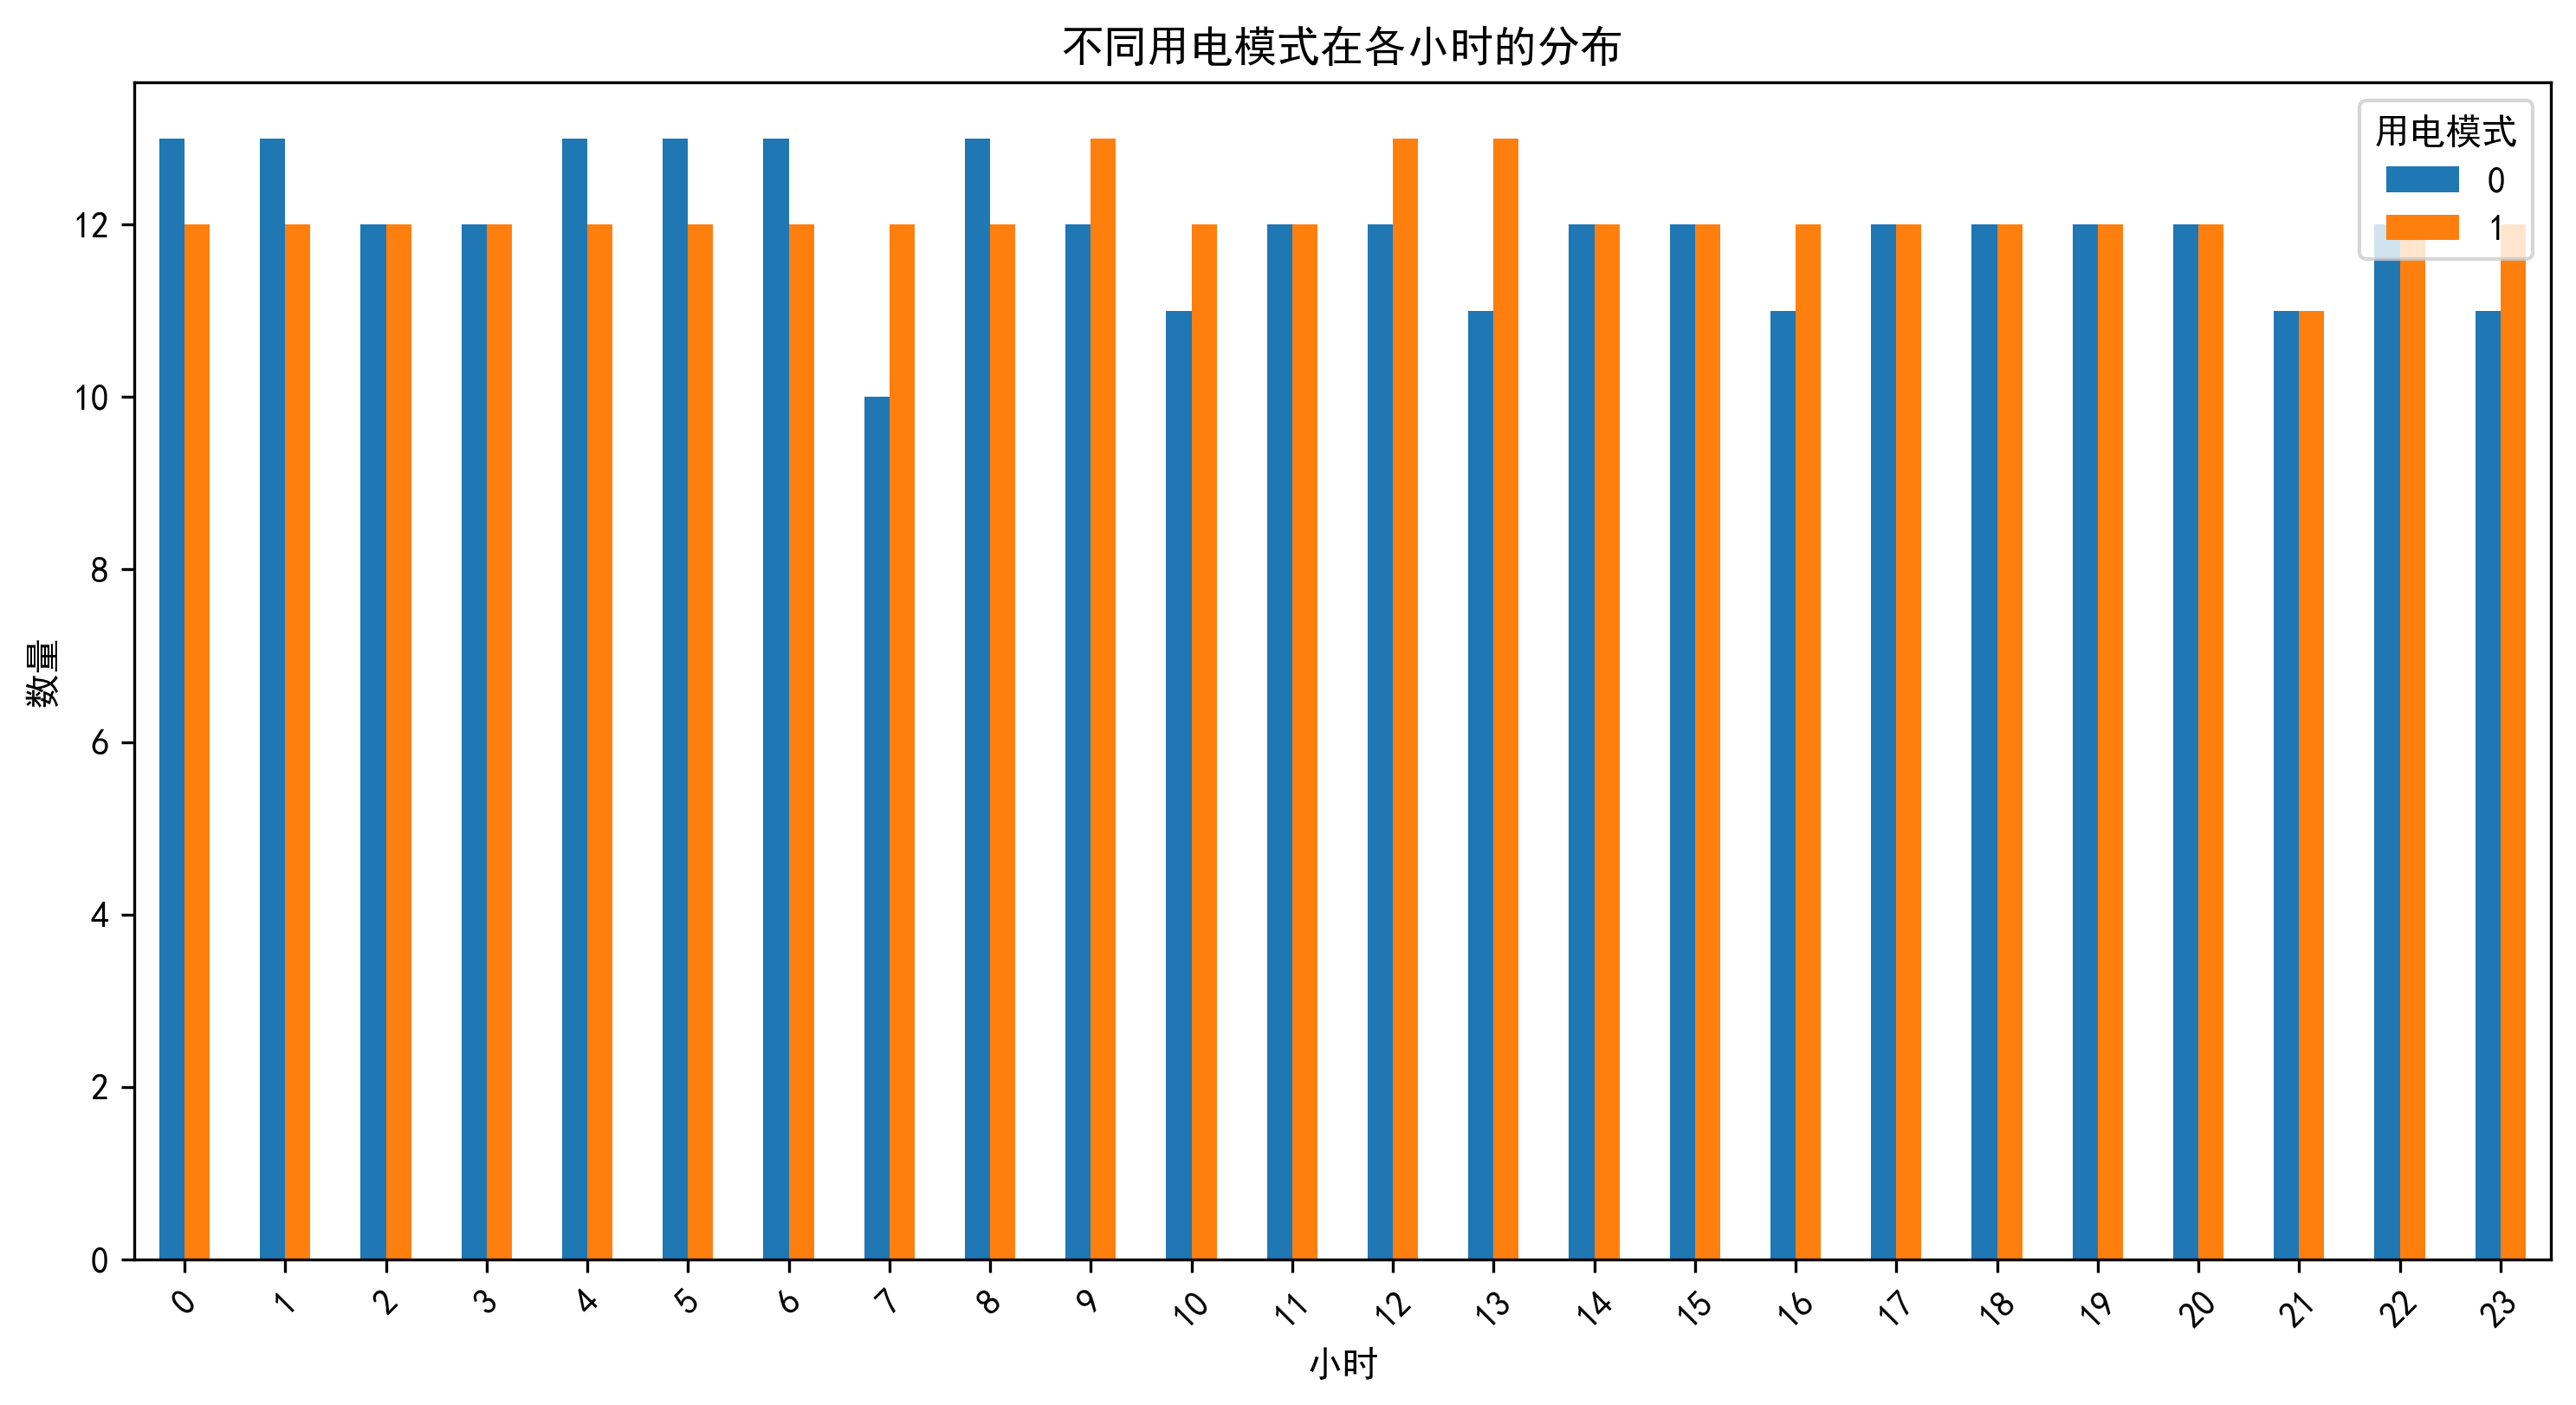

不同用电模式下各特征的均值：


,正向有功电能,A相电流,B相电流,C相电流,A相有功功率,B相有功功率,C相有功功率,视在功率
用电模式,,,,,,,,
0,9.285264e+06,572.885958,689.986167,802.362927,130.070976,156.758780,182.719617,481.242997
1,9.422935e+06,578.956586,694.964586,813.954517,131.568483,157.862103,185.221517,486.749931


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 提取小时信息
df['小时'] = pd.to_datetime(df['时间']).dt.hour

# 选取参与聚类的特征
features = ['正向有功电能', 'A相电流', 'B相电流', 'C相电流', 'A相有功功率', 'B相有功功率', 'C相有功功率', '视在功率']

# 寻找最优的簇数量
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    labels = kmeans.labels_
    score = silhouette_score(df[features], labels)
    silhouette_scores.append(score)

# 获取最优簇数量
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

# 使用最优簇数量进行KMeans聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['用电模式'] = kmeans.fit_predict(df[features])

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300


# 绘制不同用电模式在各小时的分布柱状图
hourly_pattern = df.groupby(['小时', '用电模式']).size().unstack(fill_value=0)
hourly_pattern.plot(kind='bar', figsize=(12, 6))
plt.title('不同用电模式在各小时的分布')
plt.xlabel('小时')
plt.xticks(rotation=45)
plt.ylabel('数量')
plt.legend(title='用电模式')
plt.show()

# 查看不同用电模式下各特征的均值
pattern_summary = df.groupby('用电模式')[features].mean()
print('不同用电模式下各特征的均值：')
pattern_summary

柱状图分析
用电模式分布：

用电模式0（蓝色） 和 用电模式1（橙色） 在一天24小时内的分布相对均匀，但存在明显差异。
某些小时段（如0点、1点、9点、13点、23点等）两种模式数量接近，而其他时段（如2点、3点、16点等）则一种模式占主导。

时间规律：
用电模式在不同小时的分布变化反映了用电行为的时变性。
例如，某些时段可能主要处于一种用电模式，而其他时段则可能频繁切换模式。

In [14]:
# 提取小时数据并进行聚类
hour_data = df[['小时']]
kmeans_hour = KMeans(n_clusters=best_k, random_state=42)
df['小时聚类'] = kmeans_hour.fit_predict(hour_data)

# 分析各聚类的特征（各用电相关指标的均值）
cluster_features = df.groupby('小时聚类')[features].mean()

# 分析各聚类对应的时段
cluster_hours = df.groupby('小时聚类')['小时'].unique()

# 输出结果
for cluster in range(best_k):
    print(f'用电模式 {cluster} 特征：')
    print(cluster_features.loc[cluster])
    print(f'用电模式 {cluster} 时段：{cluster_hours[cluster]}')

    print('-' * 50)

用电模式 0 特征：
正向有功电能    9.355126e+06
A相电流      6.236913e+02
B相电流      7.538086e+02
C相电流      8.711078e+02
A相有功功率    1.419828e+02
B相有功功率    1.715694e+02
C相有功功率    1.986744e+02
视在功率      5.243494e+02
Name: 0, dtype: float64
用电模式 0 时段：[12 13 14 15 17 18 19 20 21 22 16 23]
--------------------------------------------------
用电模式 1 特征：
正向有功电能    9.353805e+06
A相电流      5.293276e+02
B相电流      6.326380e+02
C相电流      7.467782e+02
A相有功功率    1.199319e+02
B相有功功率    1.433990e+02
C相有功功率    1.696321e+02
视在功率      4.446391e+02
Name: 1, dtype: float64
用电模式 1 时段：[ 0  1  2  3  4  5  6  8  9 10 11  7]
--------------------------------------------------


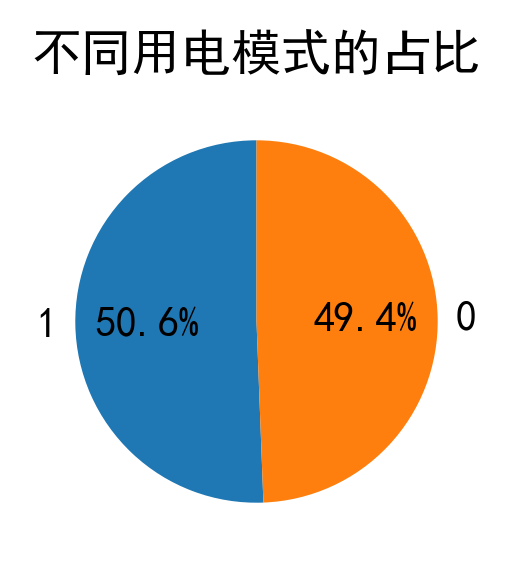

In [15]:
# 统计不同用电模式的数量
mode_counts = df['小时聚类'].value_counts()

# 绘制饼图
plt.figure(figsize=(2, 2))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('不同用电模式的占比')
plt.show()

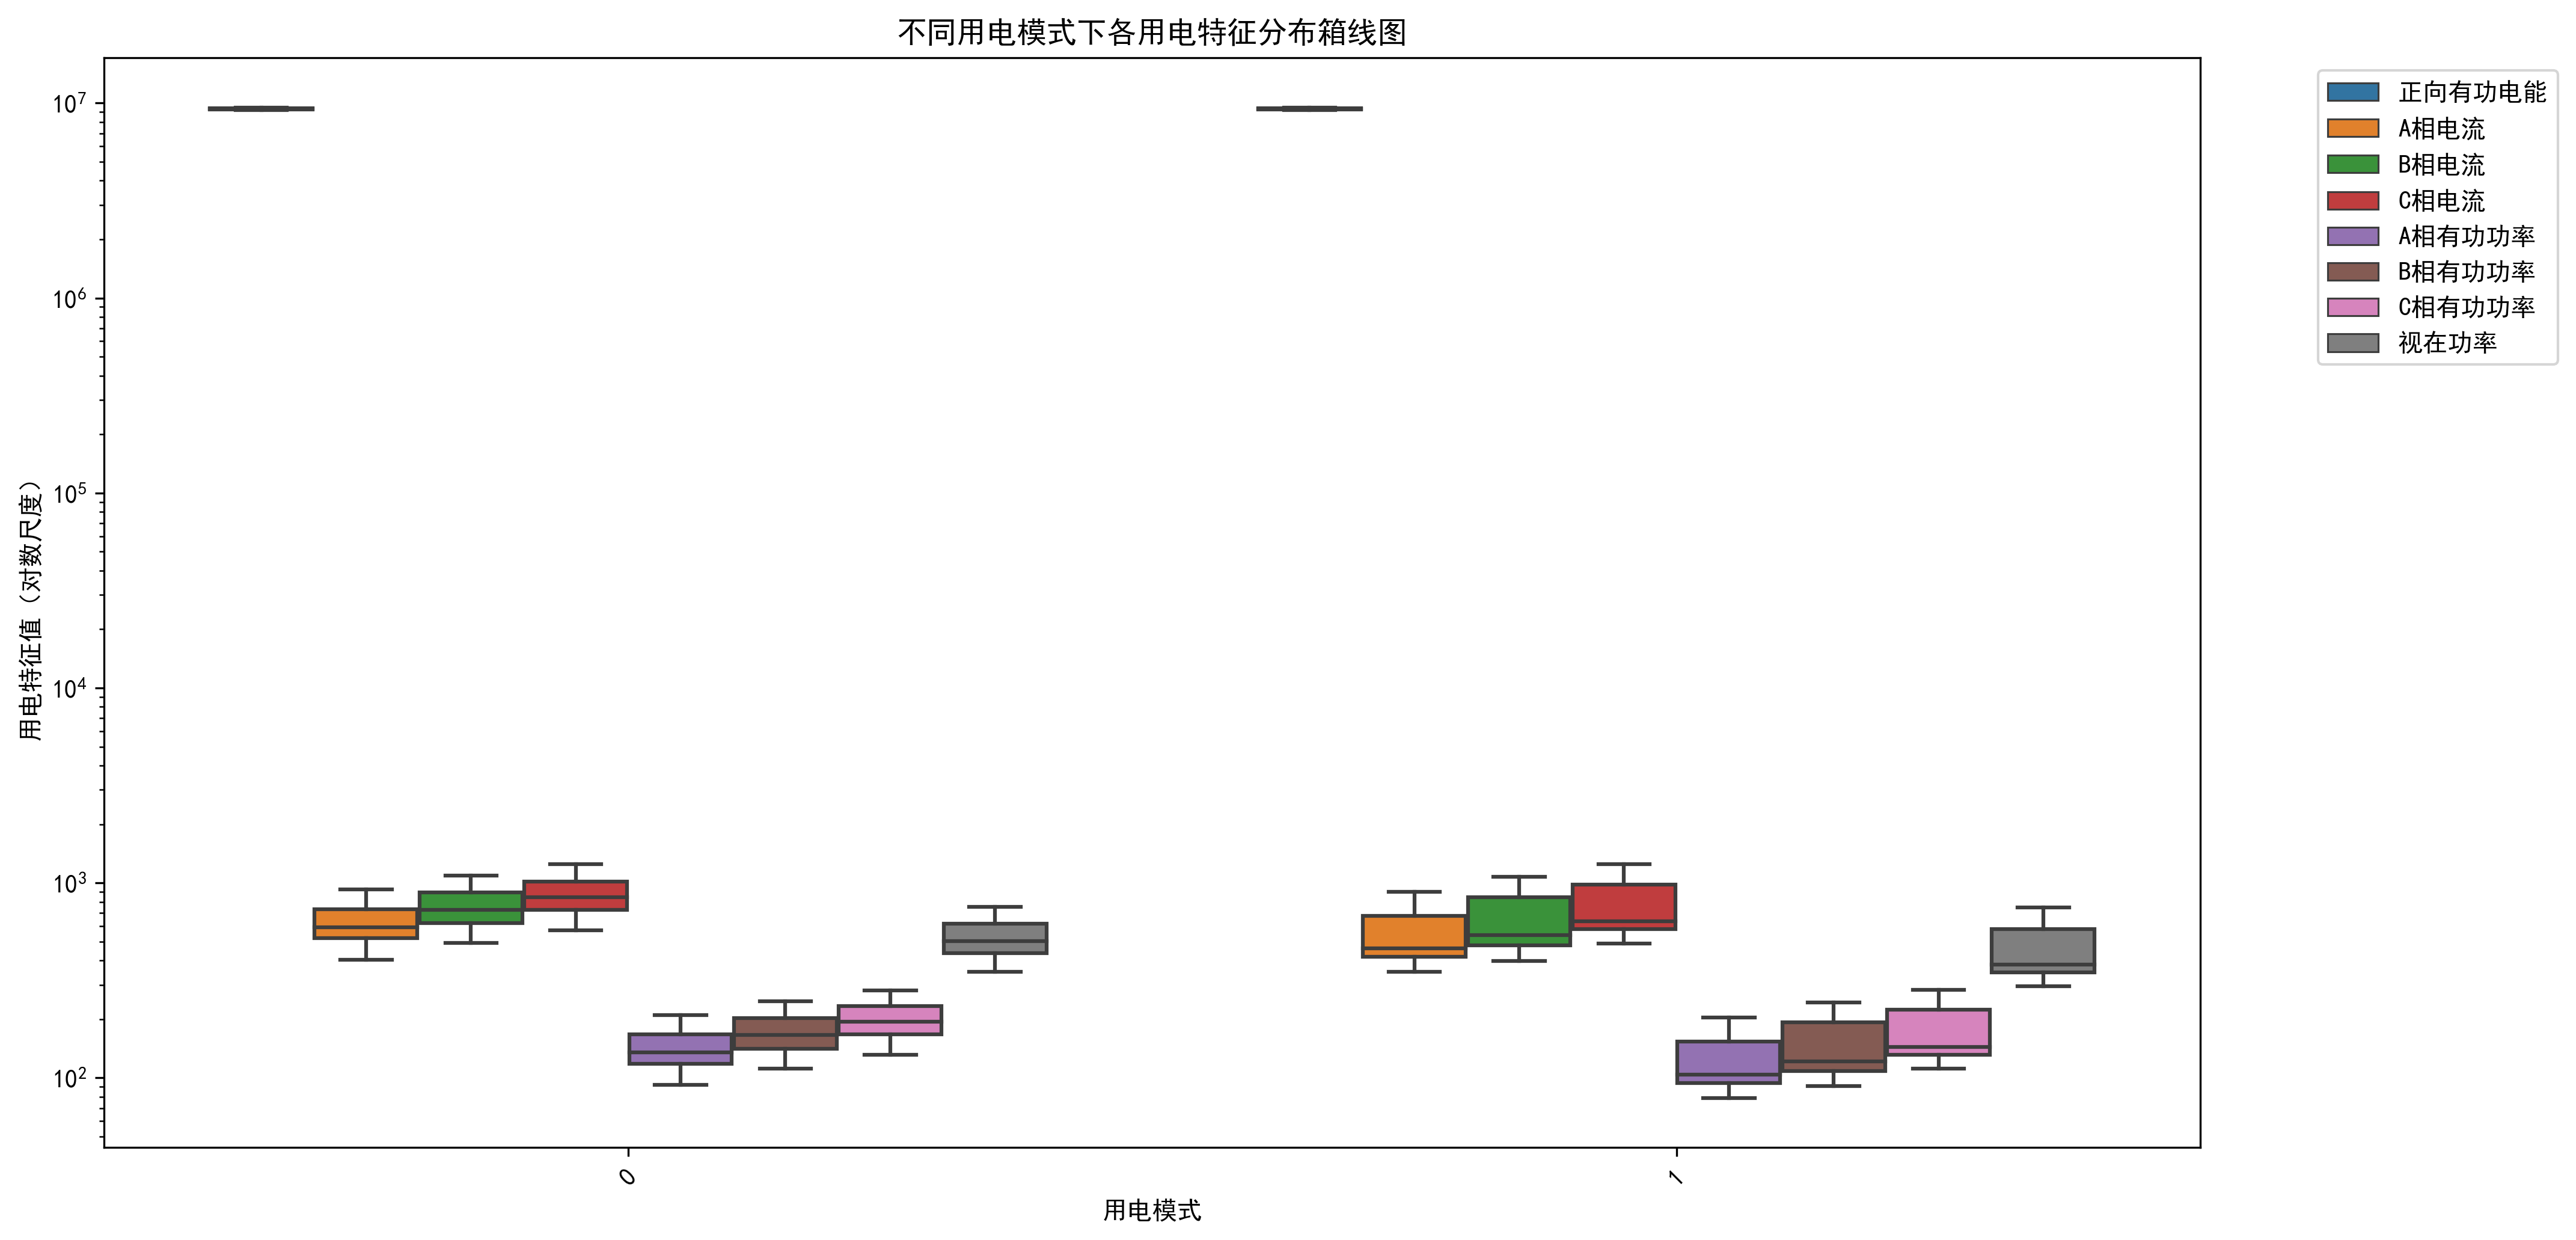

In [16]:
# 绘制箱线图展示不同用电模式下各特征的分布
df_melted = pd.melt(df, id_vars=['小时聚类'], value_vars=features)
plt.figure(figsize=(15, 8))
ax = plt.subplot(1, 1, 1)
ax.set_yscale('log')
import seaborn as sns
sns.boxplot(x='小时聚类', y='value', hue='variable', data=df_melted, ax=ax)
plt.title('不同用电模式下各用电特征分布箱线图')
plt.xlabel('用电模式')
plt.xticks(rotation=45)
plt.ylabel('用电特征值（对数尺度）')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

最优聚类数: 2


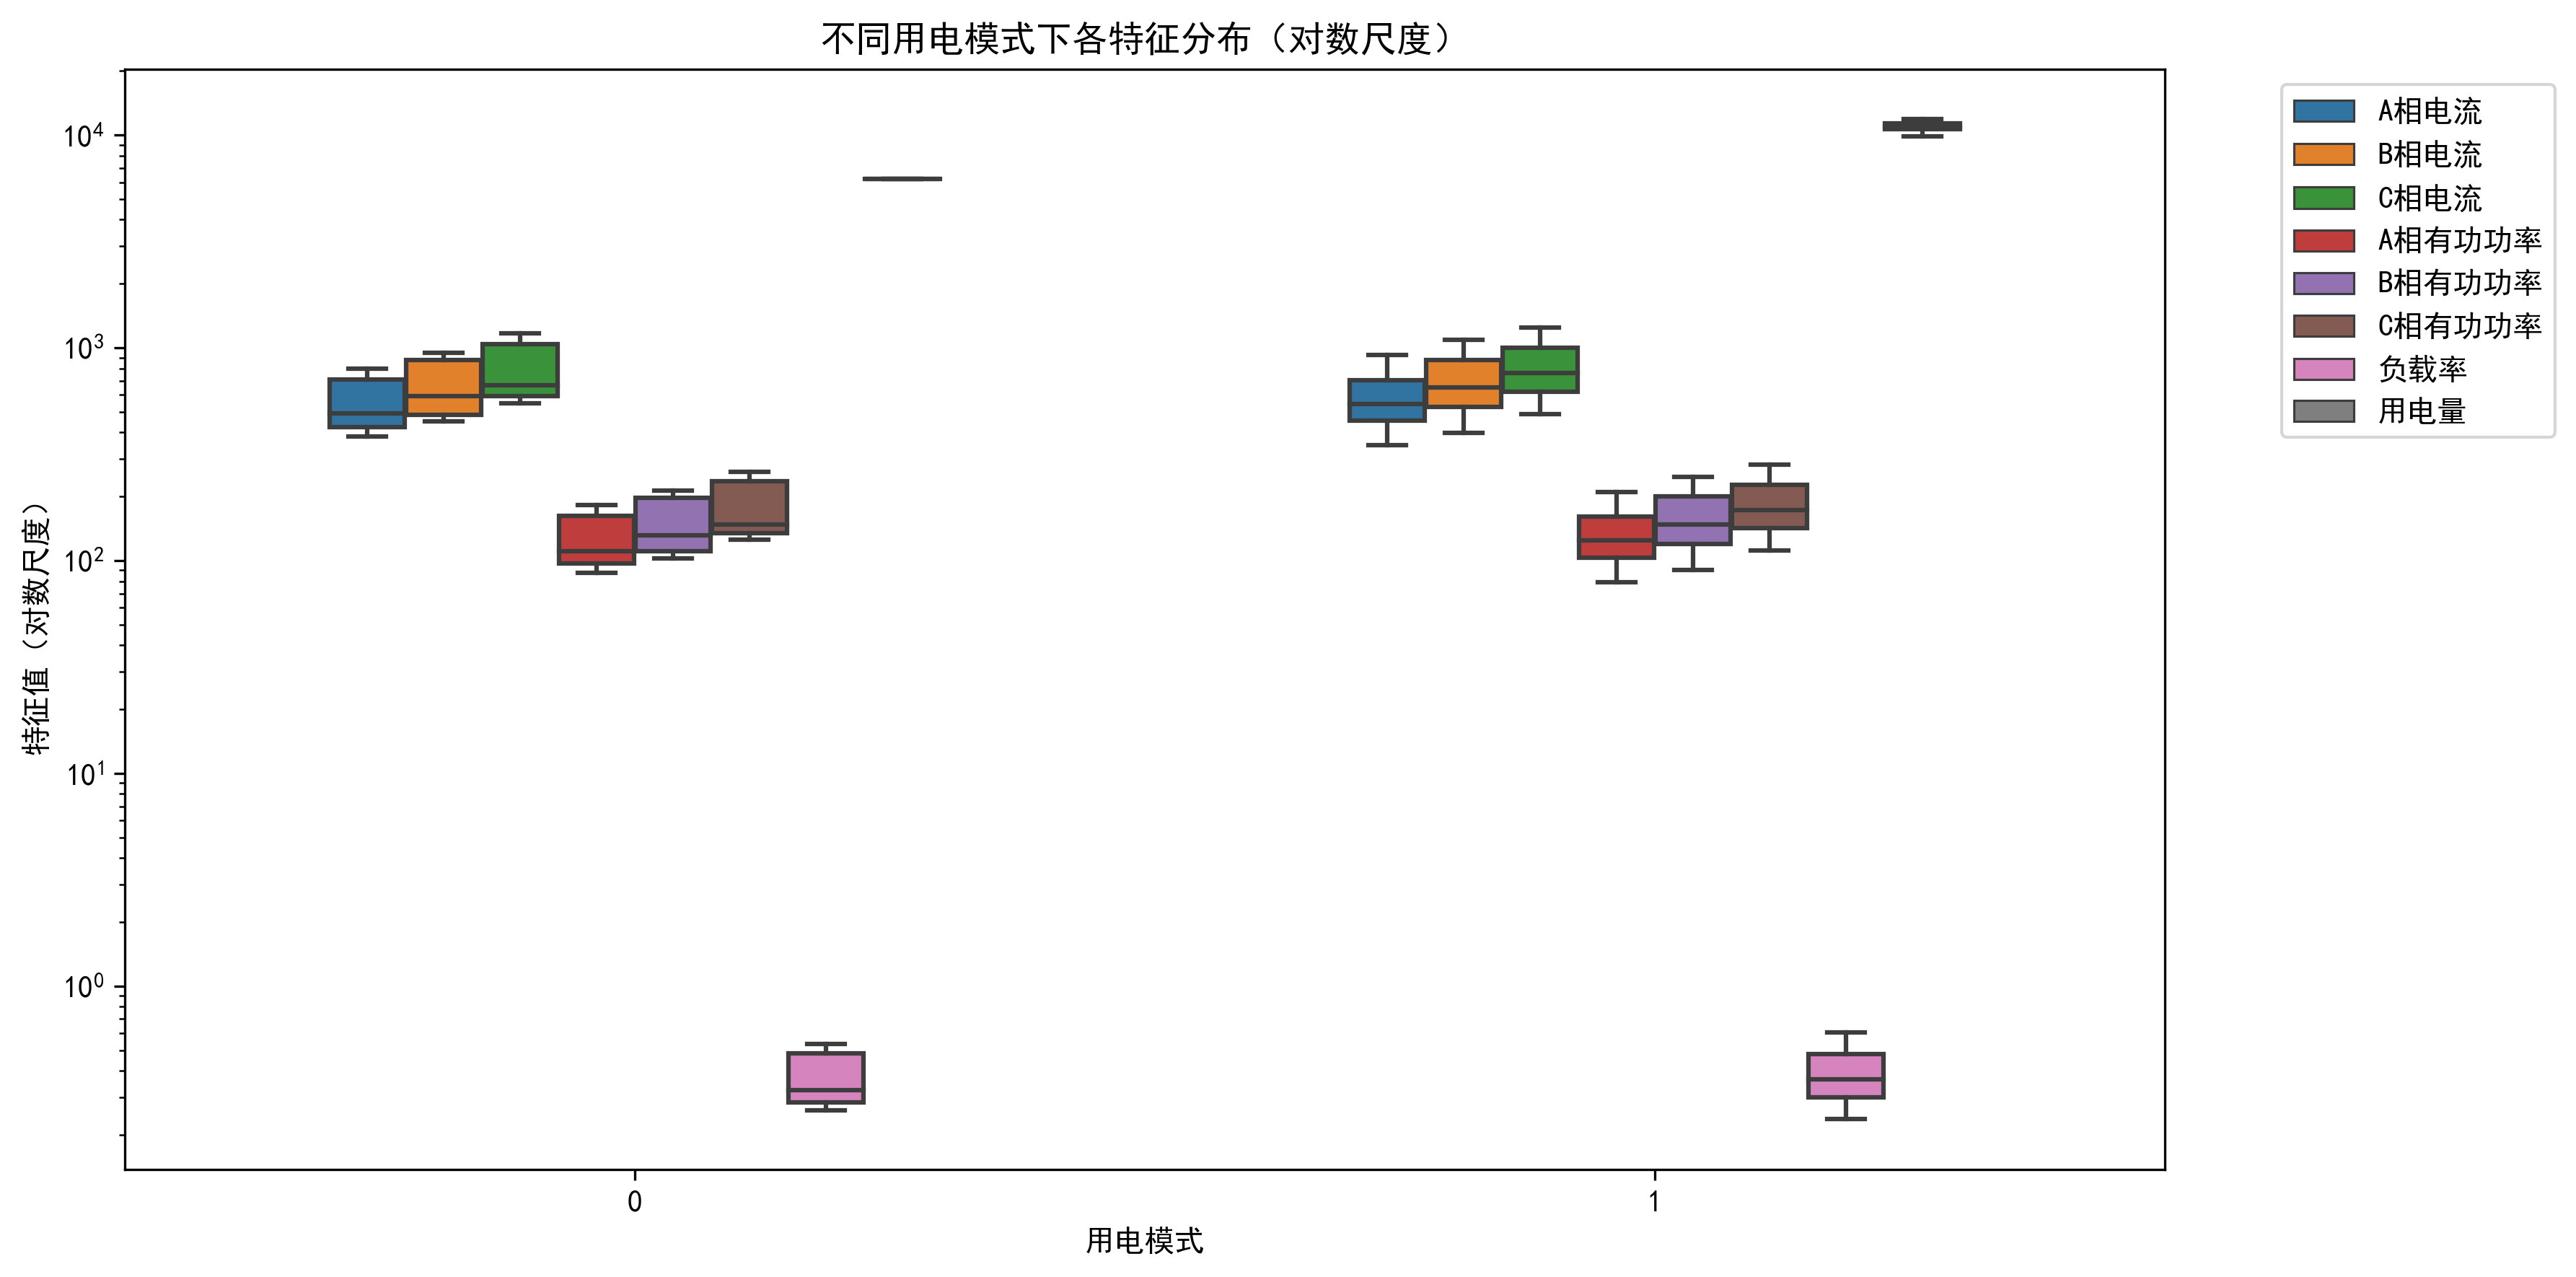

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings


plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
warnings.filterwarnings('ignore')  # 忽略警告


df = pd.read_excel('c:/lsx/用电数据 (2)_删除缺失值.xlsx')
    

# 数据预处理（计算负载率和用电量）

df['时间'] = pd.to_datetime(df['时间'])
df['小时'] = df['时间'].dt.hour
df['日期'] = df['时间'].dt.date

# 计算负载率（视在功率/额定功率1250kVA）
df['负载率'] = df['视在功率'] / 1250

# 计算每日用电量（当日23点-0点的正向有功电能差值）
daily_energy = df.groupby('日期').agg(
    用电量=('正向有功电能', lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()
df = pd.merge(df, daily_energy, on='日期', how='left')


# 4. 聚类分析

# 选择聚类特征
features = ['A相电流', 'B相电流', 'C相电流',
            'A相有功功率', 'B相有功功率', 'C相有功功率',
            '负载率', '用电量']

# 确定最优聚类数（2-10类）
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[features])
    silhouette_scores.append(silhouette_score(df[features], labels))
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # 最优聚类数
print(f"最优聚类数: {best_k}")

# 执行聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['用电模式'] = kmeans.fit_predict(df[features])


# 结果分析

# 各模式特征均值
cluster_features_mean = df.groupby('用电模式')[features].mean()


# 转换为长格式数据（用于分组可视化）
df_melted = pd.melt(df, id_vars=['用电模式'], value_vars=features)


plt.figure(figsize=(12, 6))  # 缩小整体尺寸
ax = plt.subplot(1, 1, 1)
sns.boxplot(x='用电模式', y='value', hue='variable', data=df_melted, ax=ax, width=0.6)
ax.set_yscale('log')  # 压缩数值范围，避免极端值影响
plt.title('不同用电模式下各特征分布（对数尺度）')
plt.xlabel('用电模式')
plt.ylabel('特征值（对数尺度）')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # 图例放右侧
plt.tight_layout()  # 自动调整布局
plt.show()

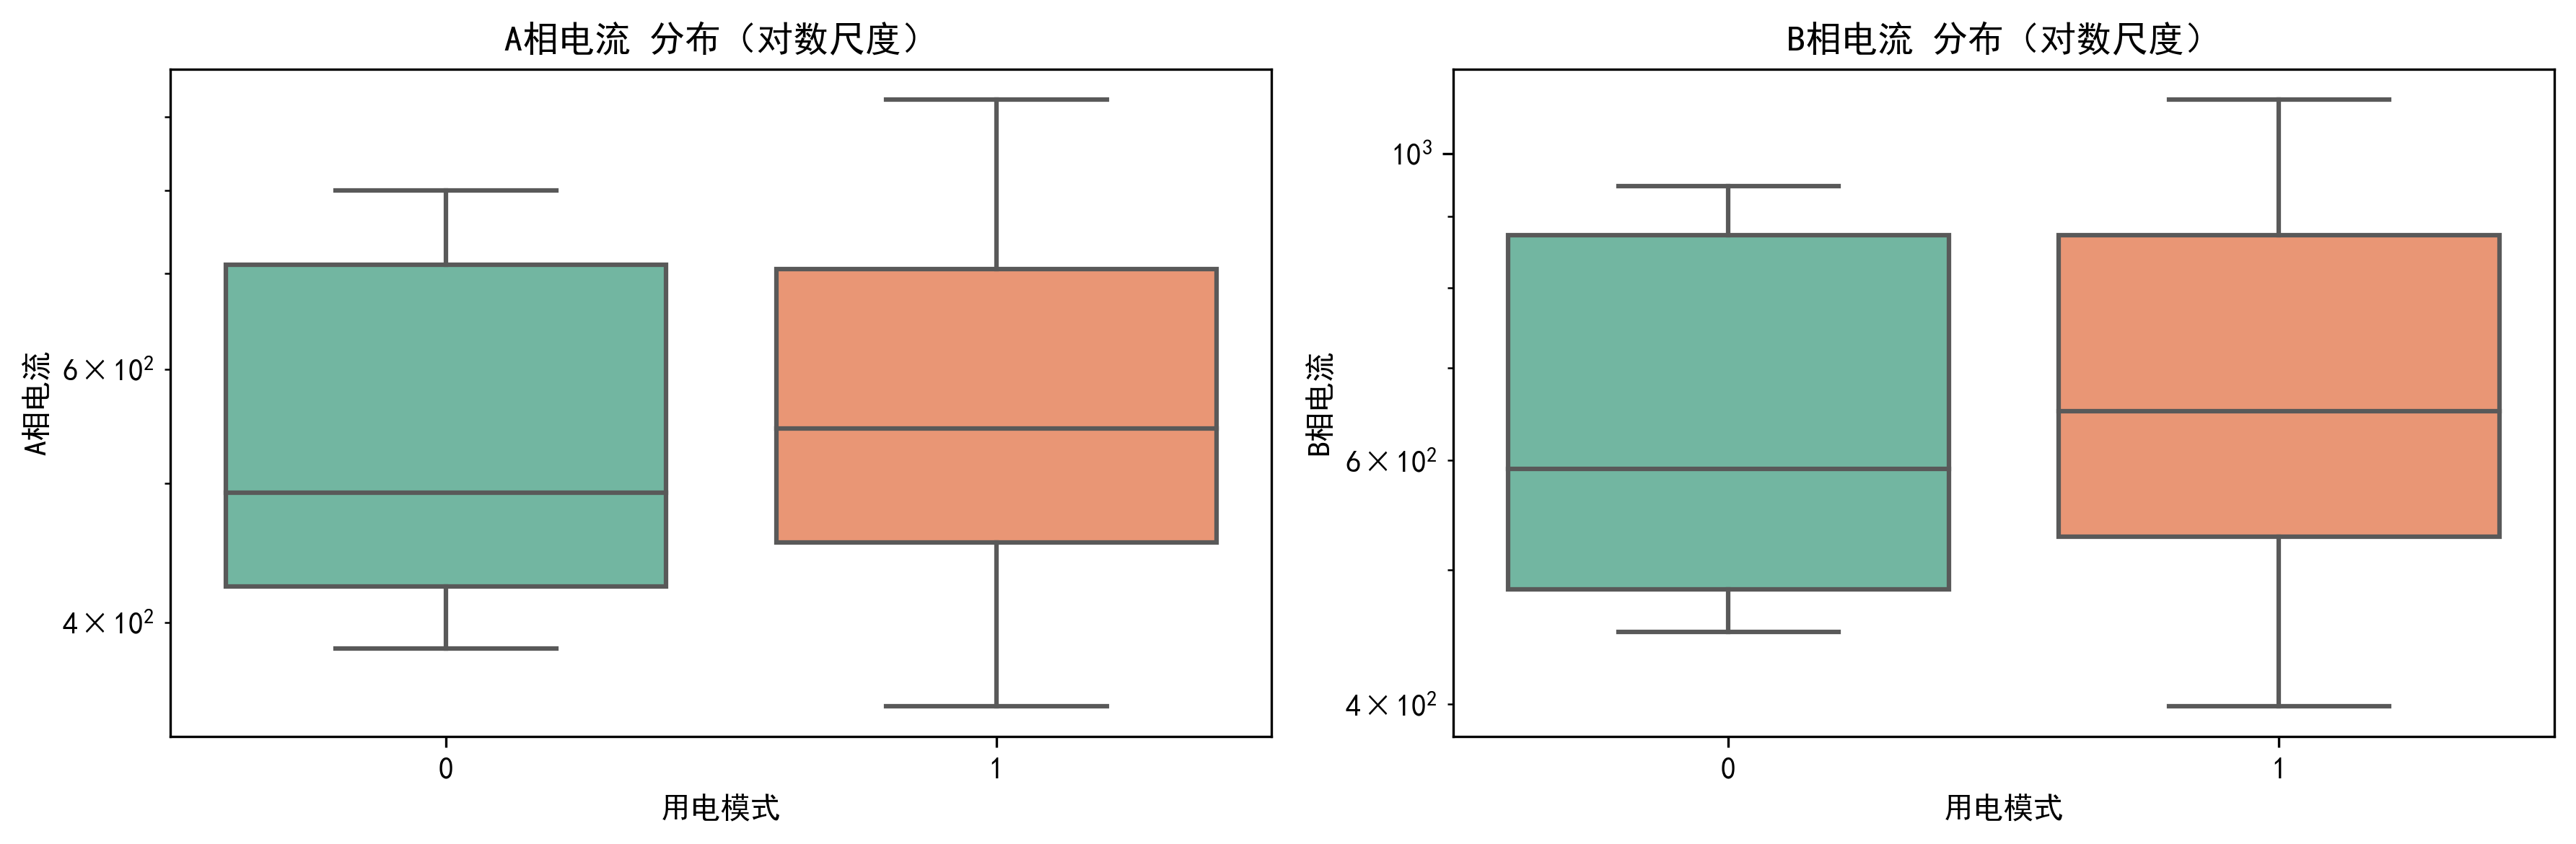

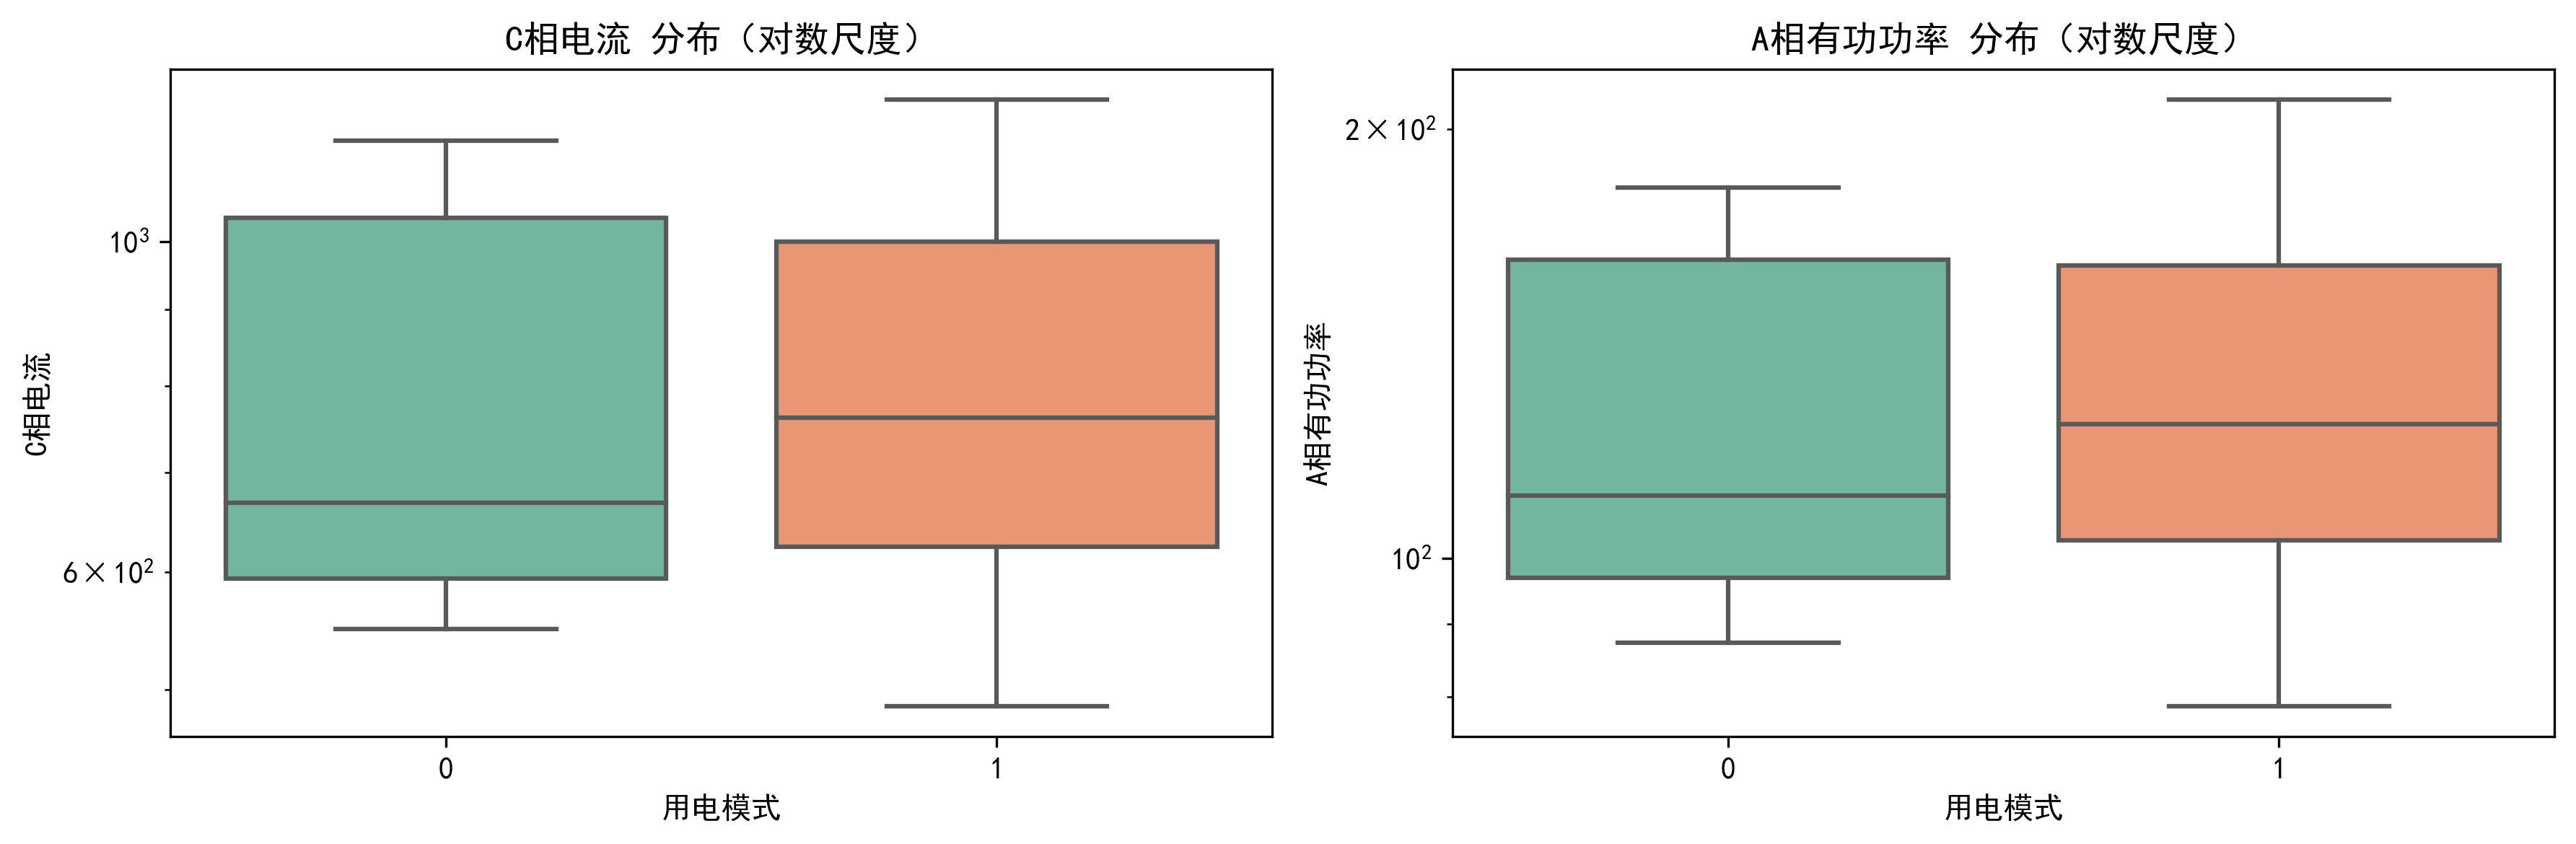

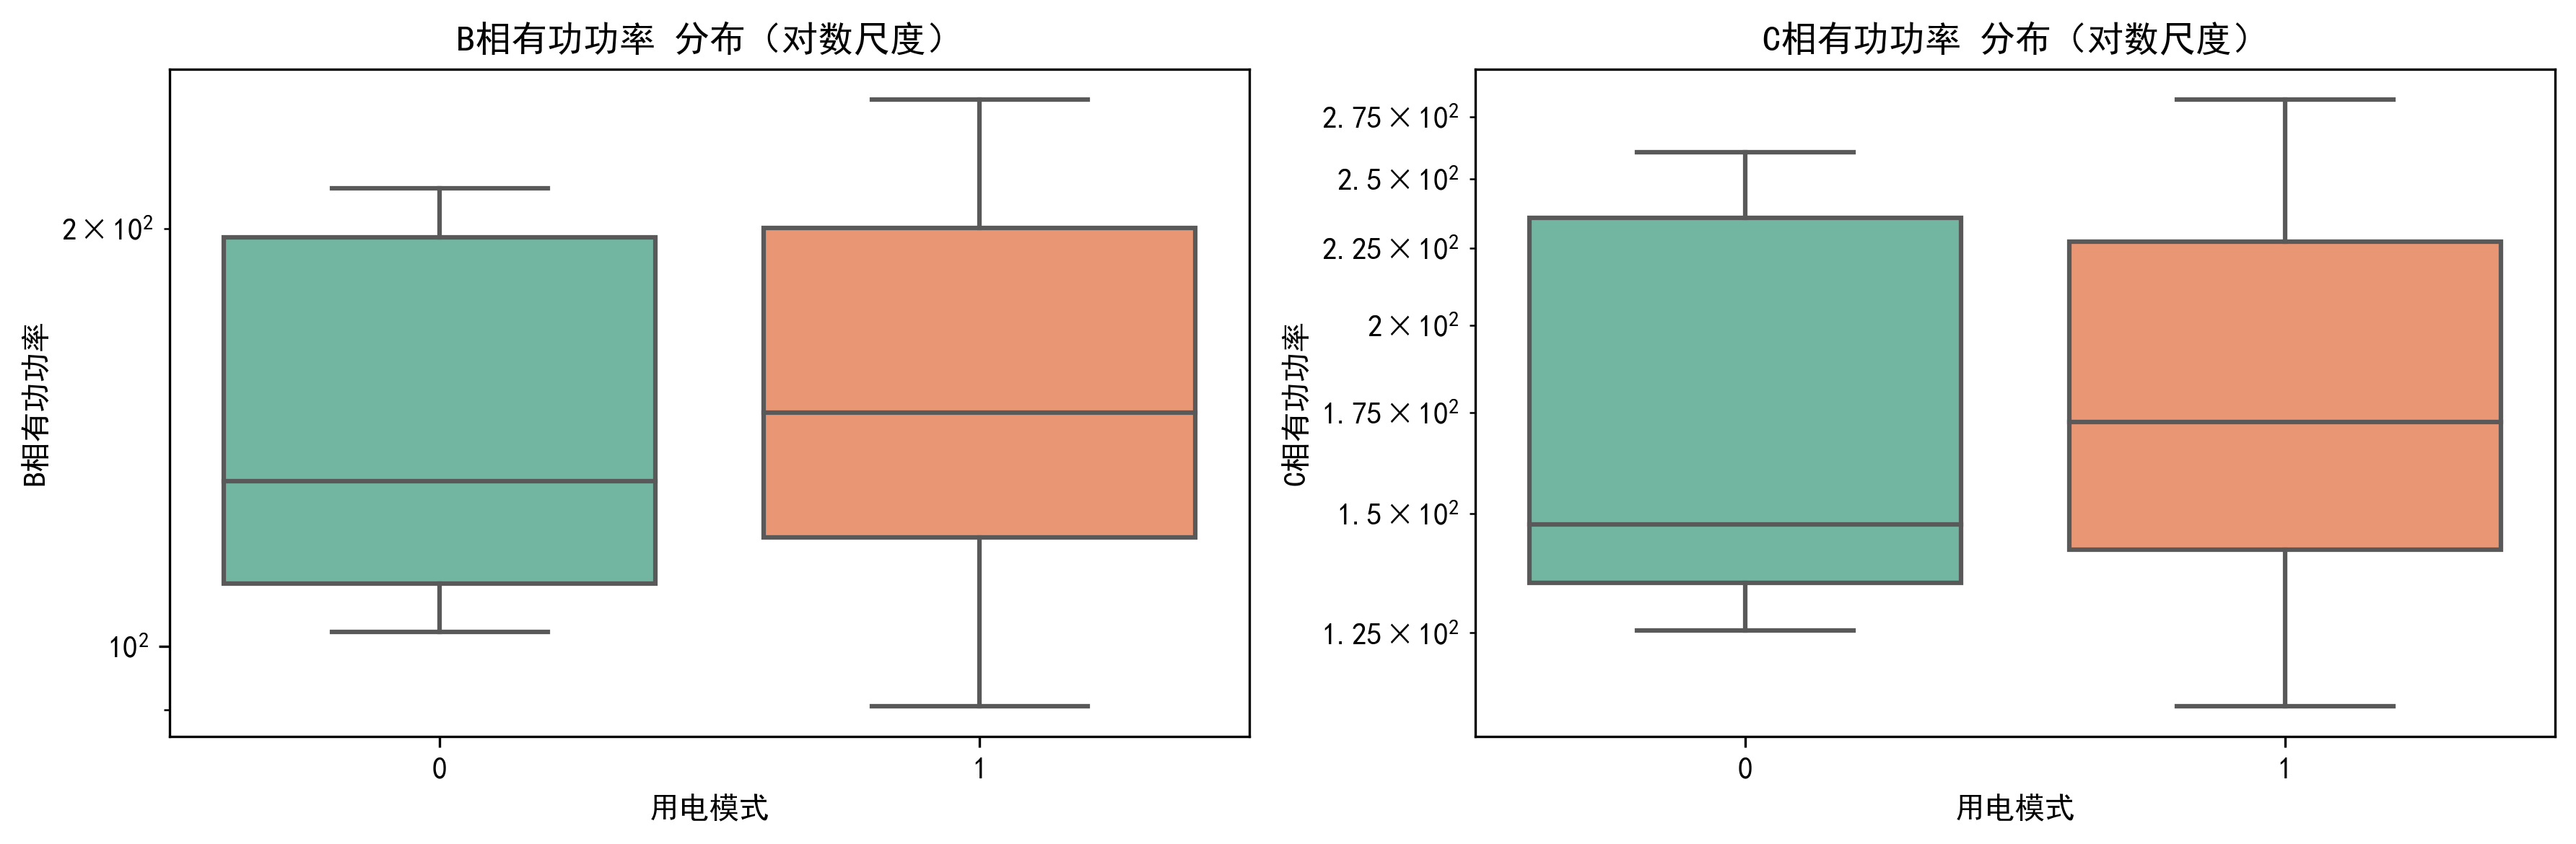

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

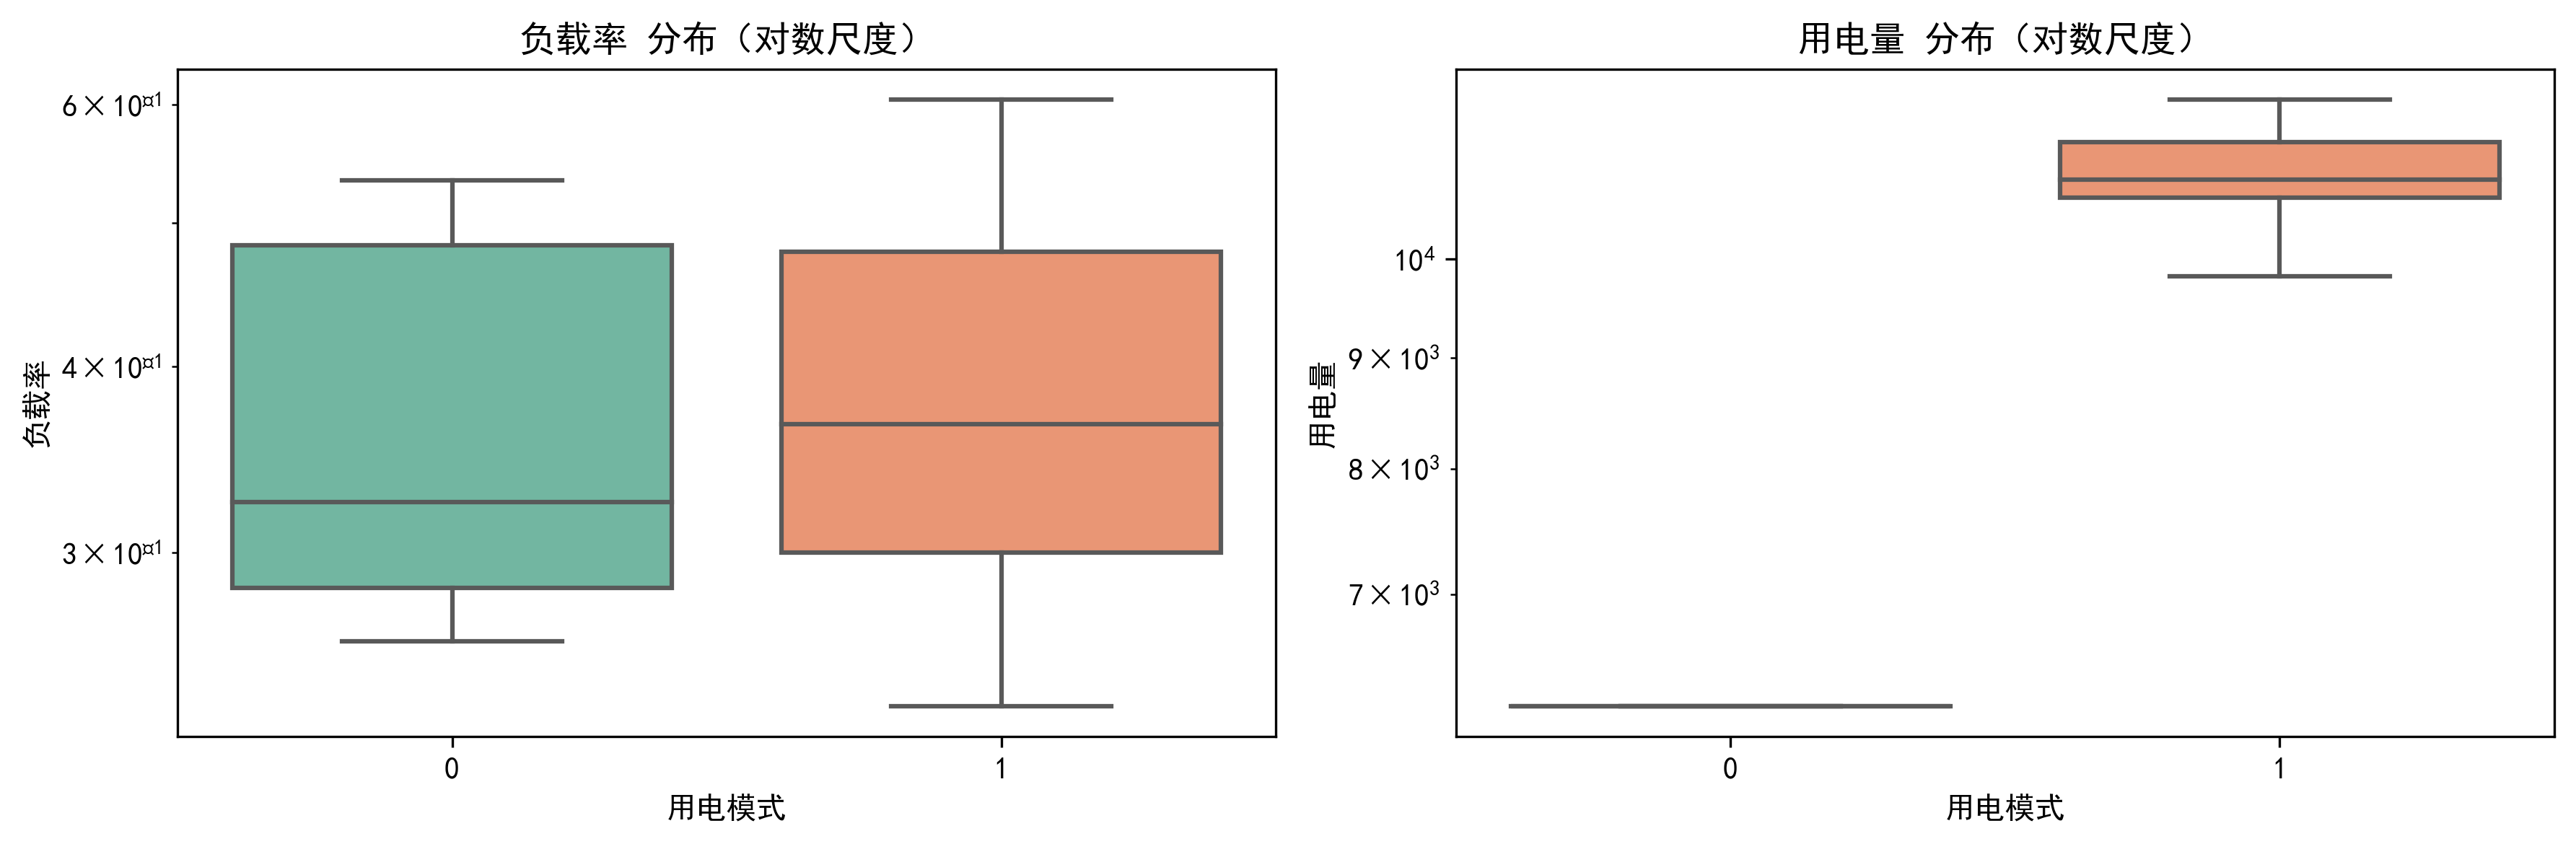

In [18]:
# 分特征可视化（拆分图表，避免单图过高）
# 每次显示2个特征，分多组绘制（避免单图尺寸超过限制）
for i in range(0, len(features), 2):
    subset_features = features[i:i+2]
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 一行2个子图
    for idx, var in enumerate(subset_features):
        sns.boxplot(x='用电模式', y=var, data=df, ax=axes[idx], palette='Set2')
        axes[idx].set_yscale('log')
        axes[idx].set_title(f'{var} 分布（对数尺度）')
        axes[idx].set_xlabel('用电模式')
    plt.tight_layout()
    plt.show()

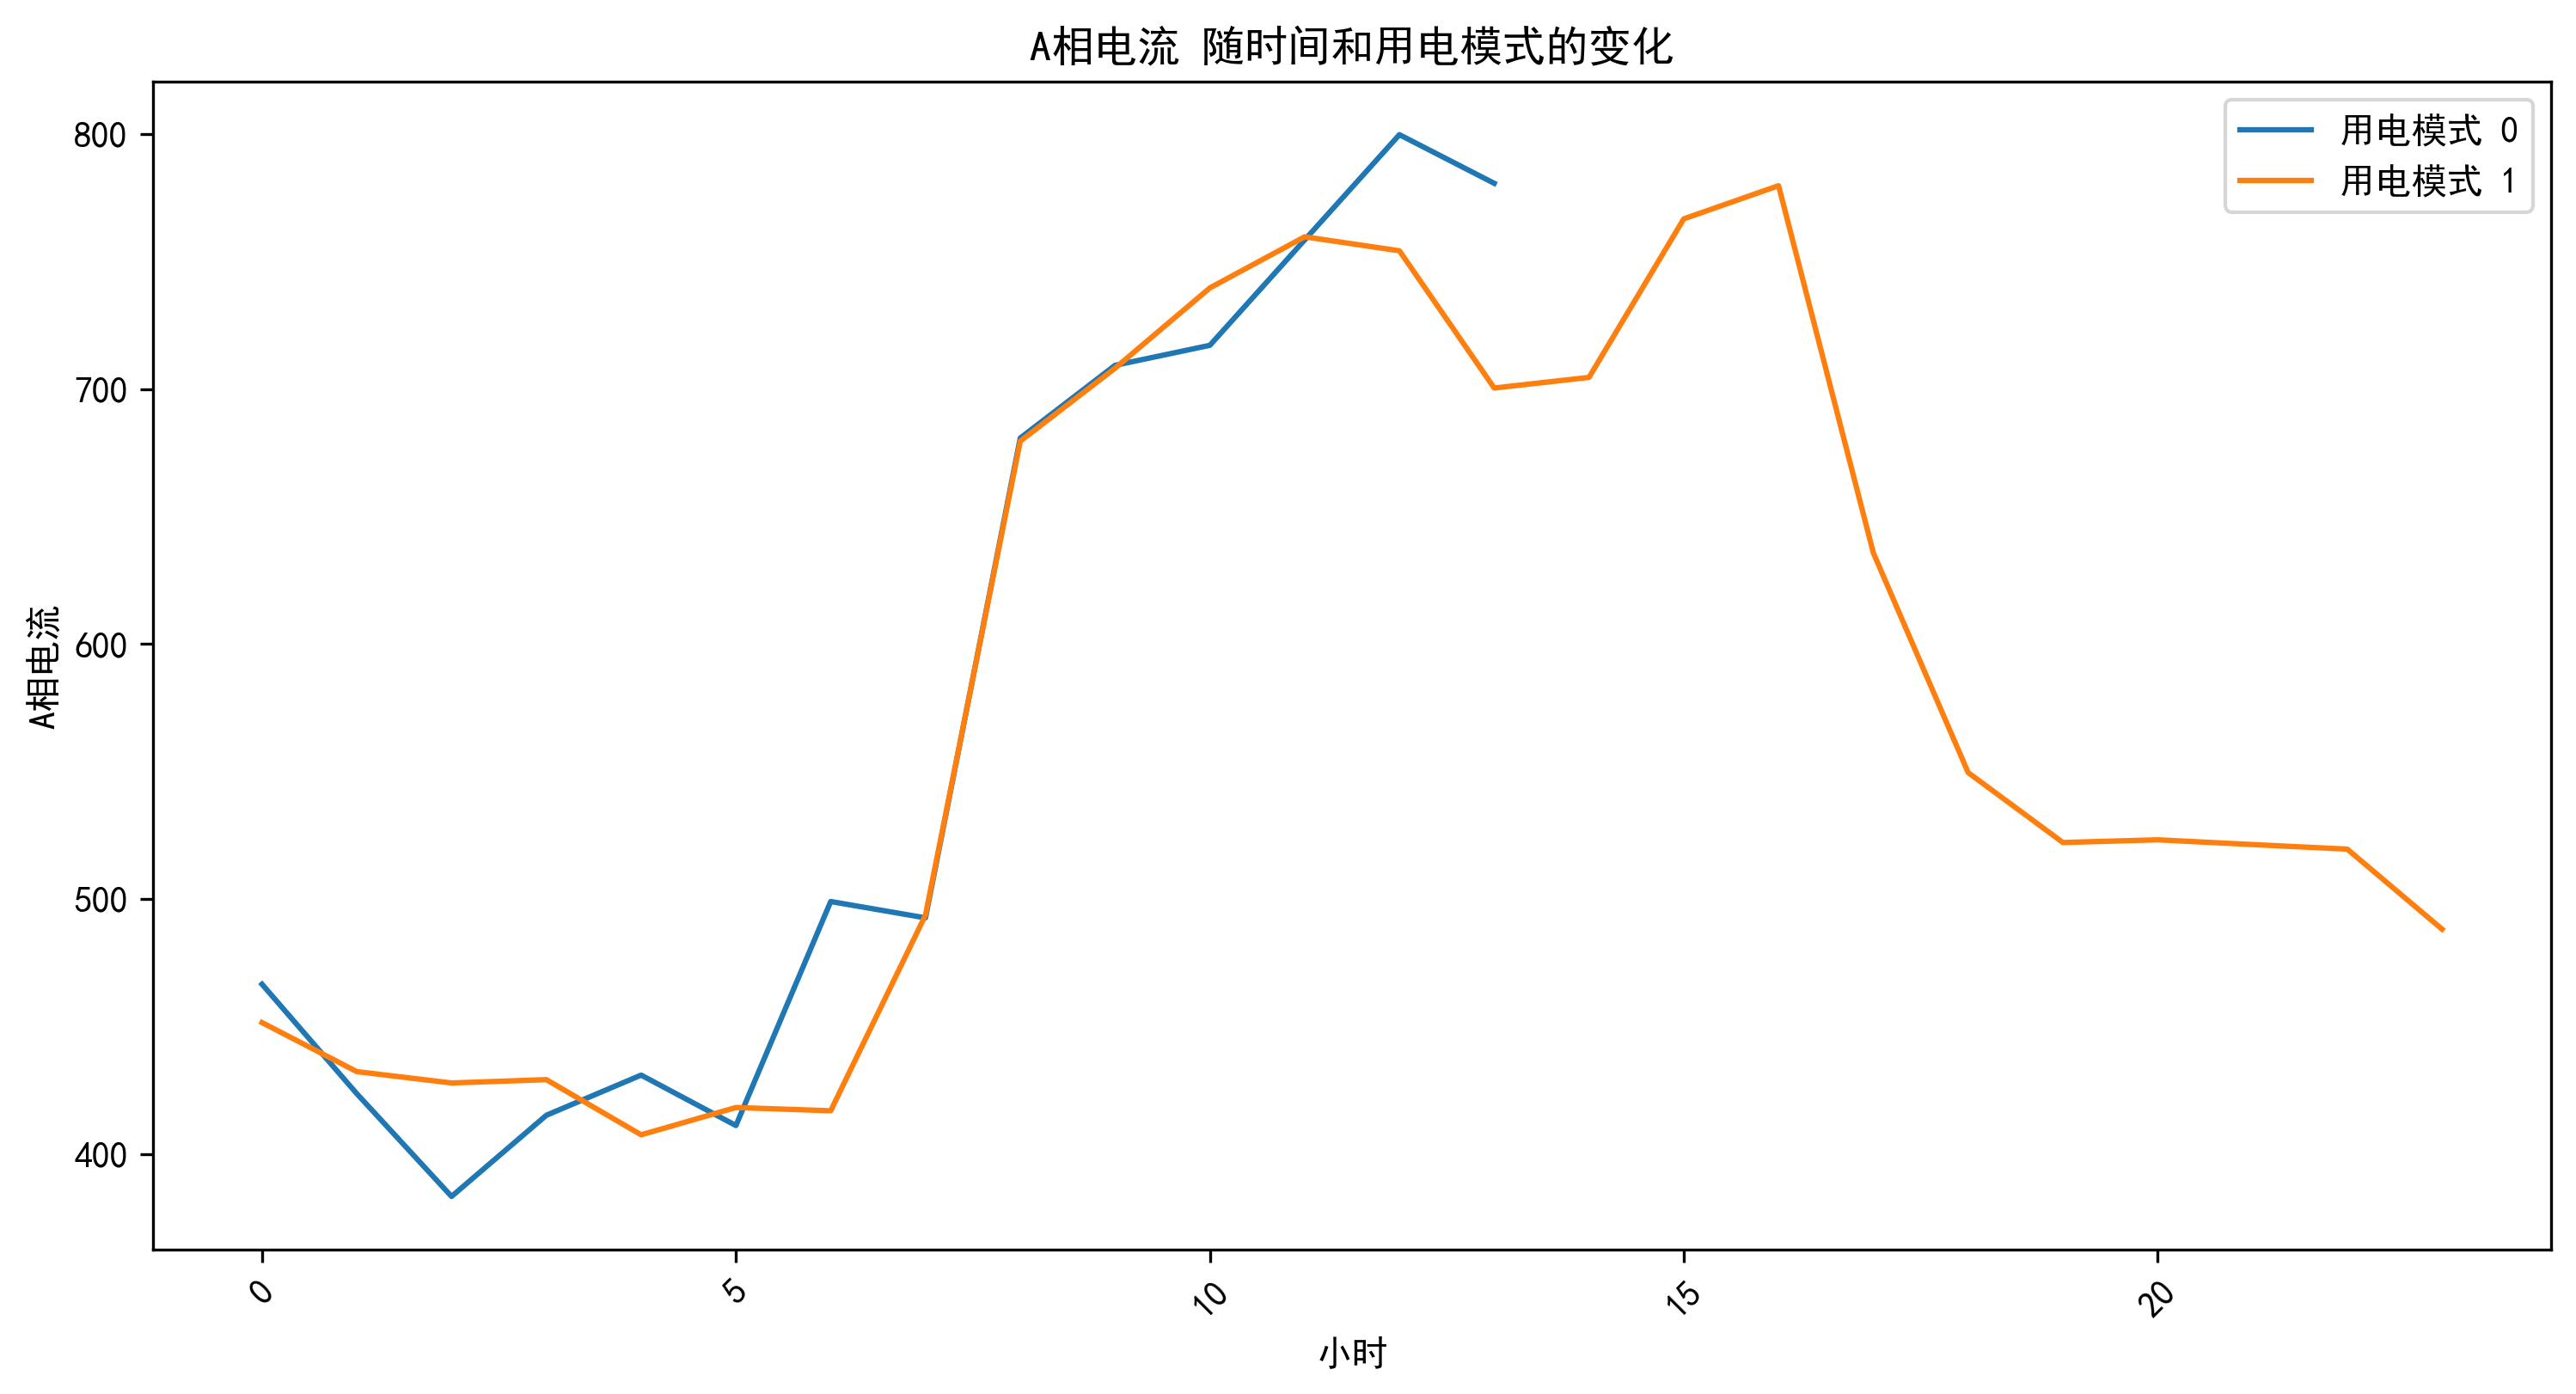

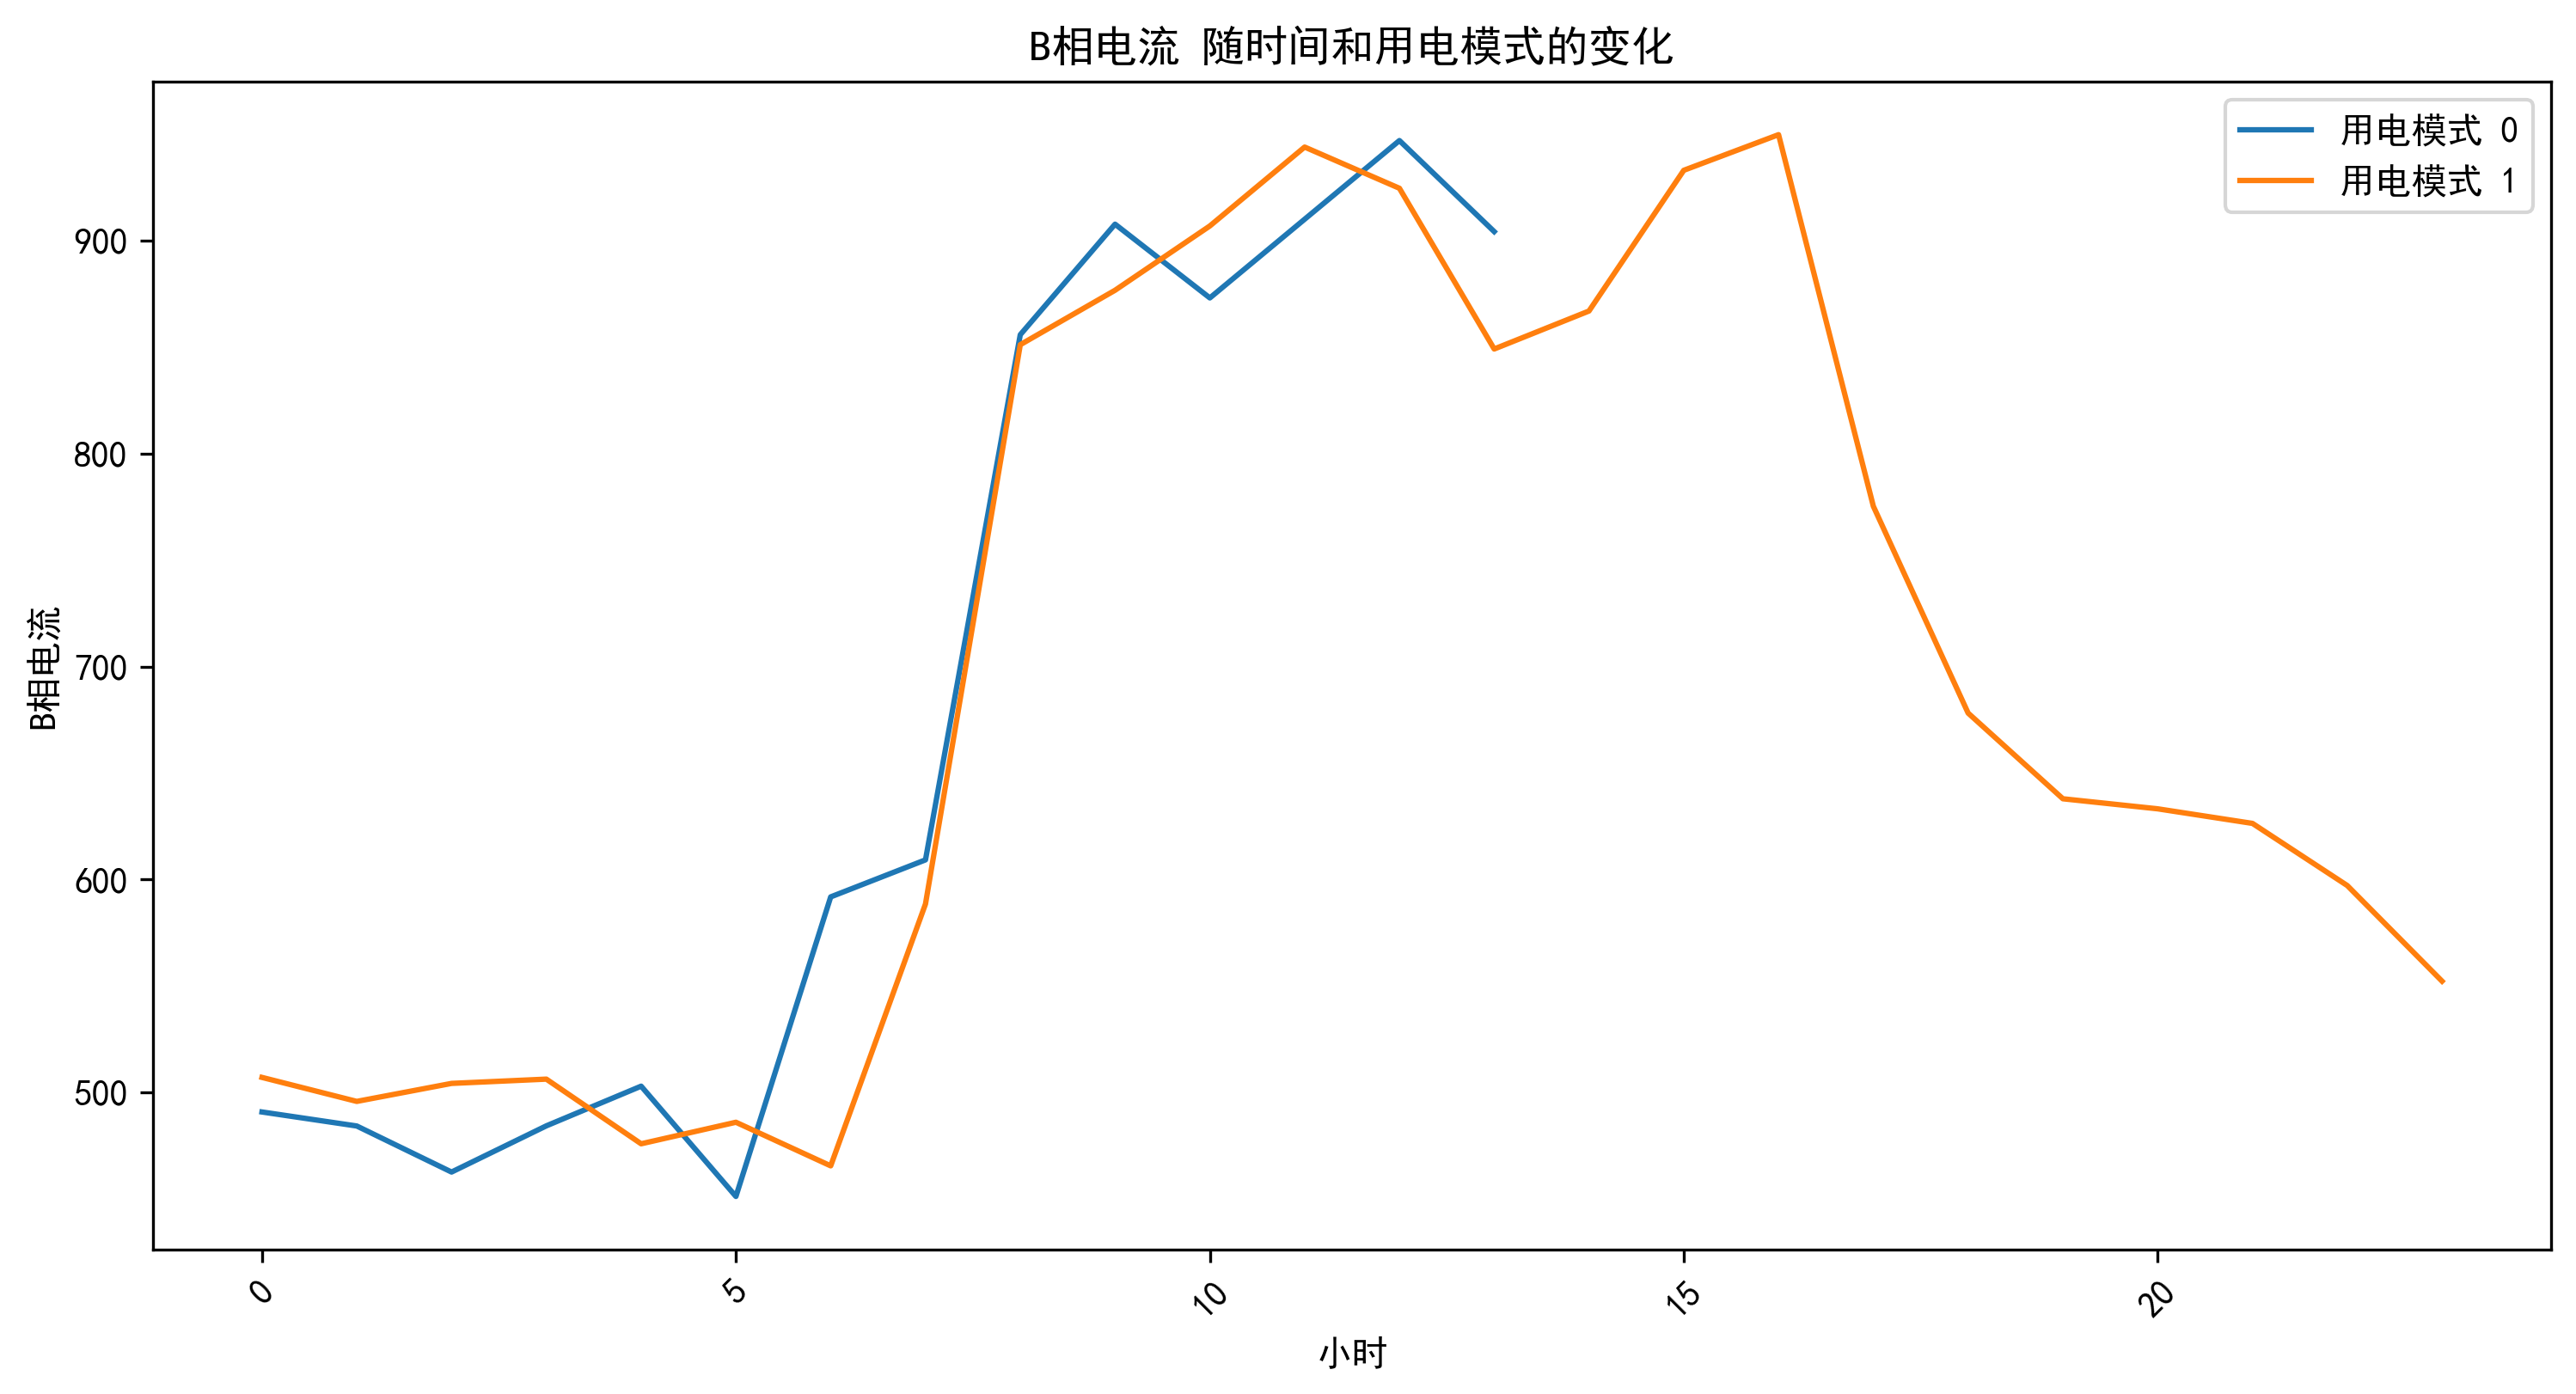

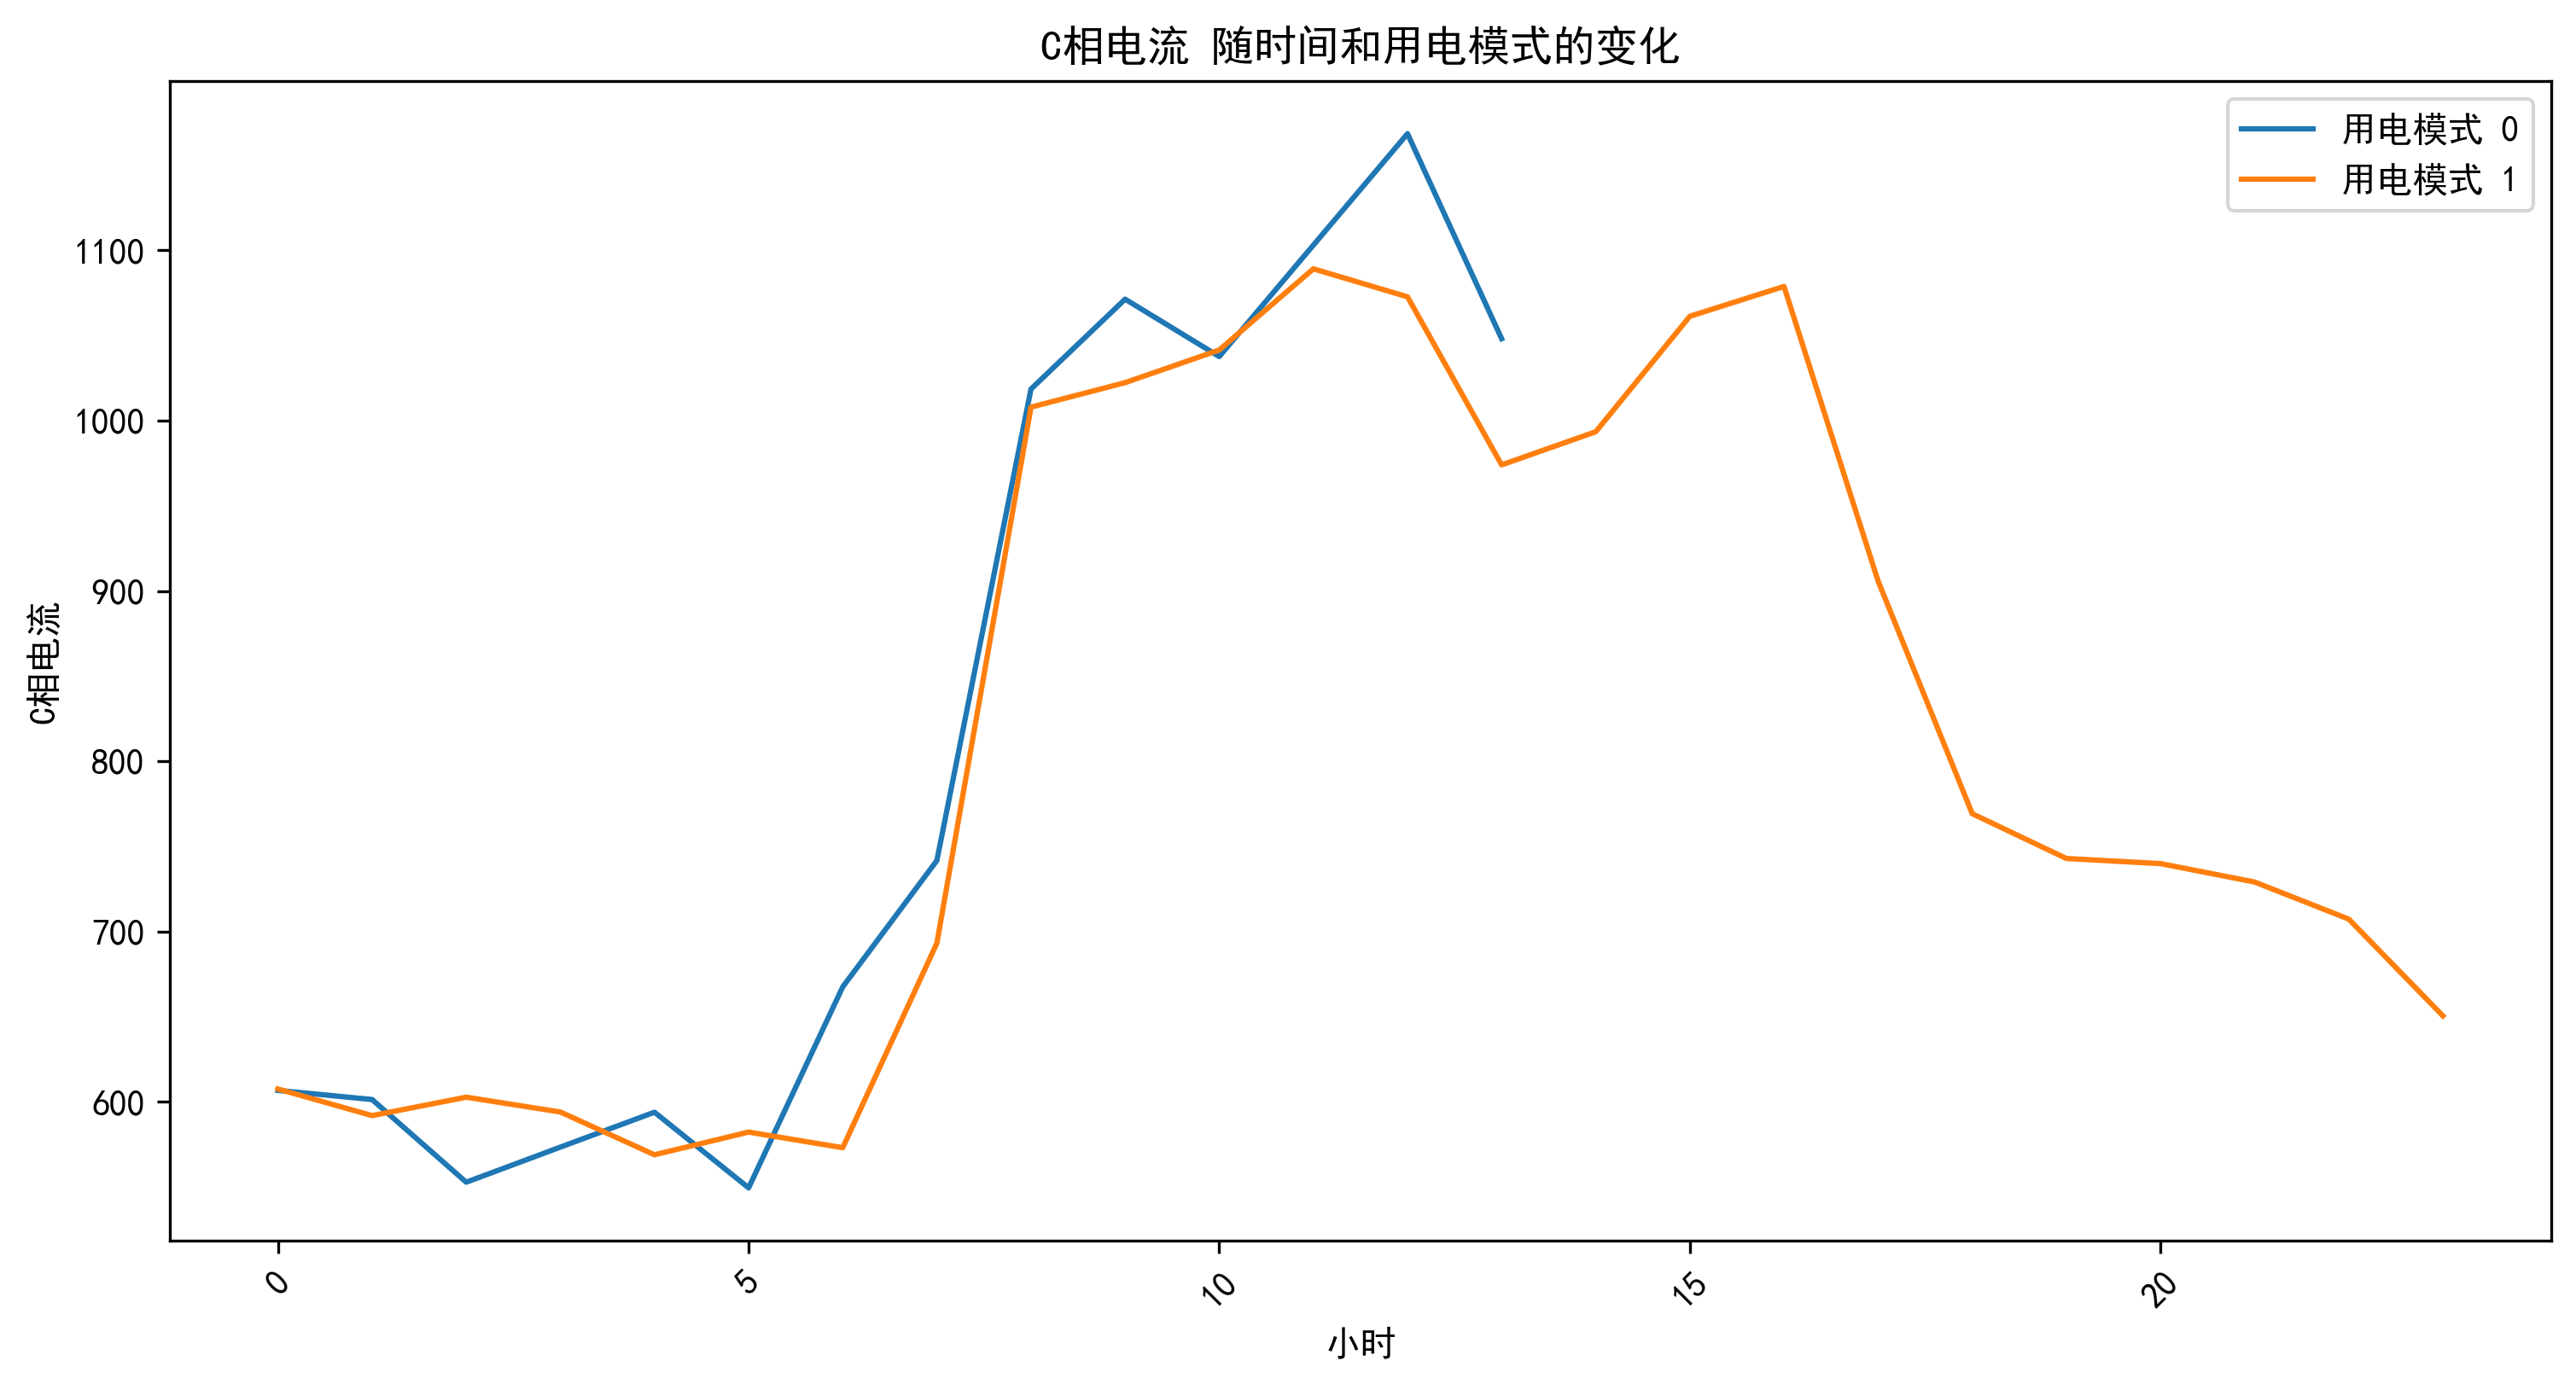

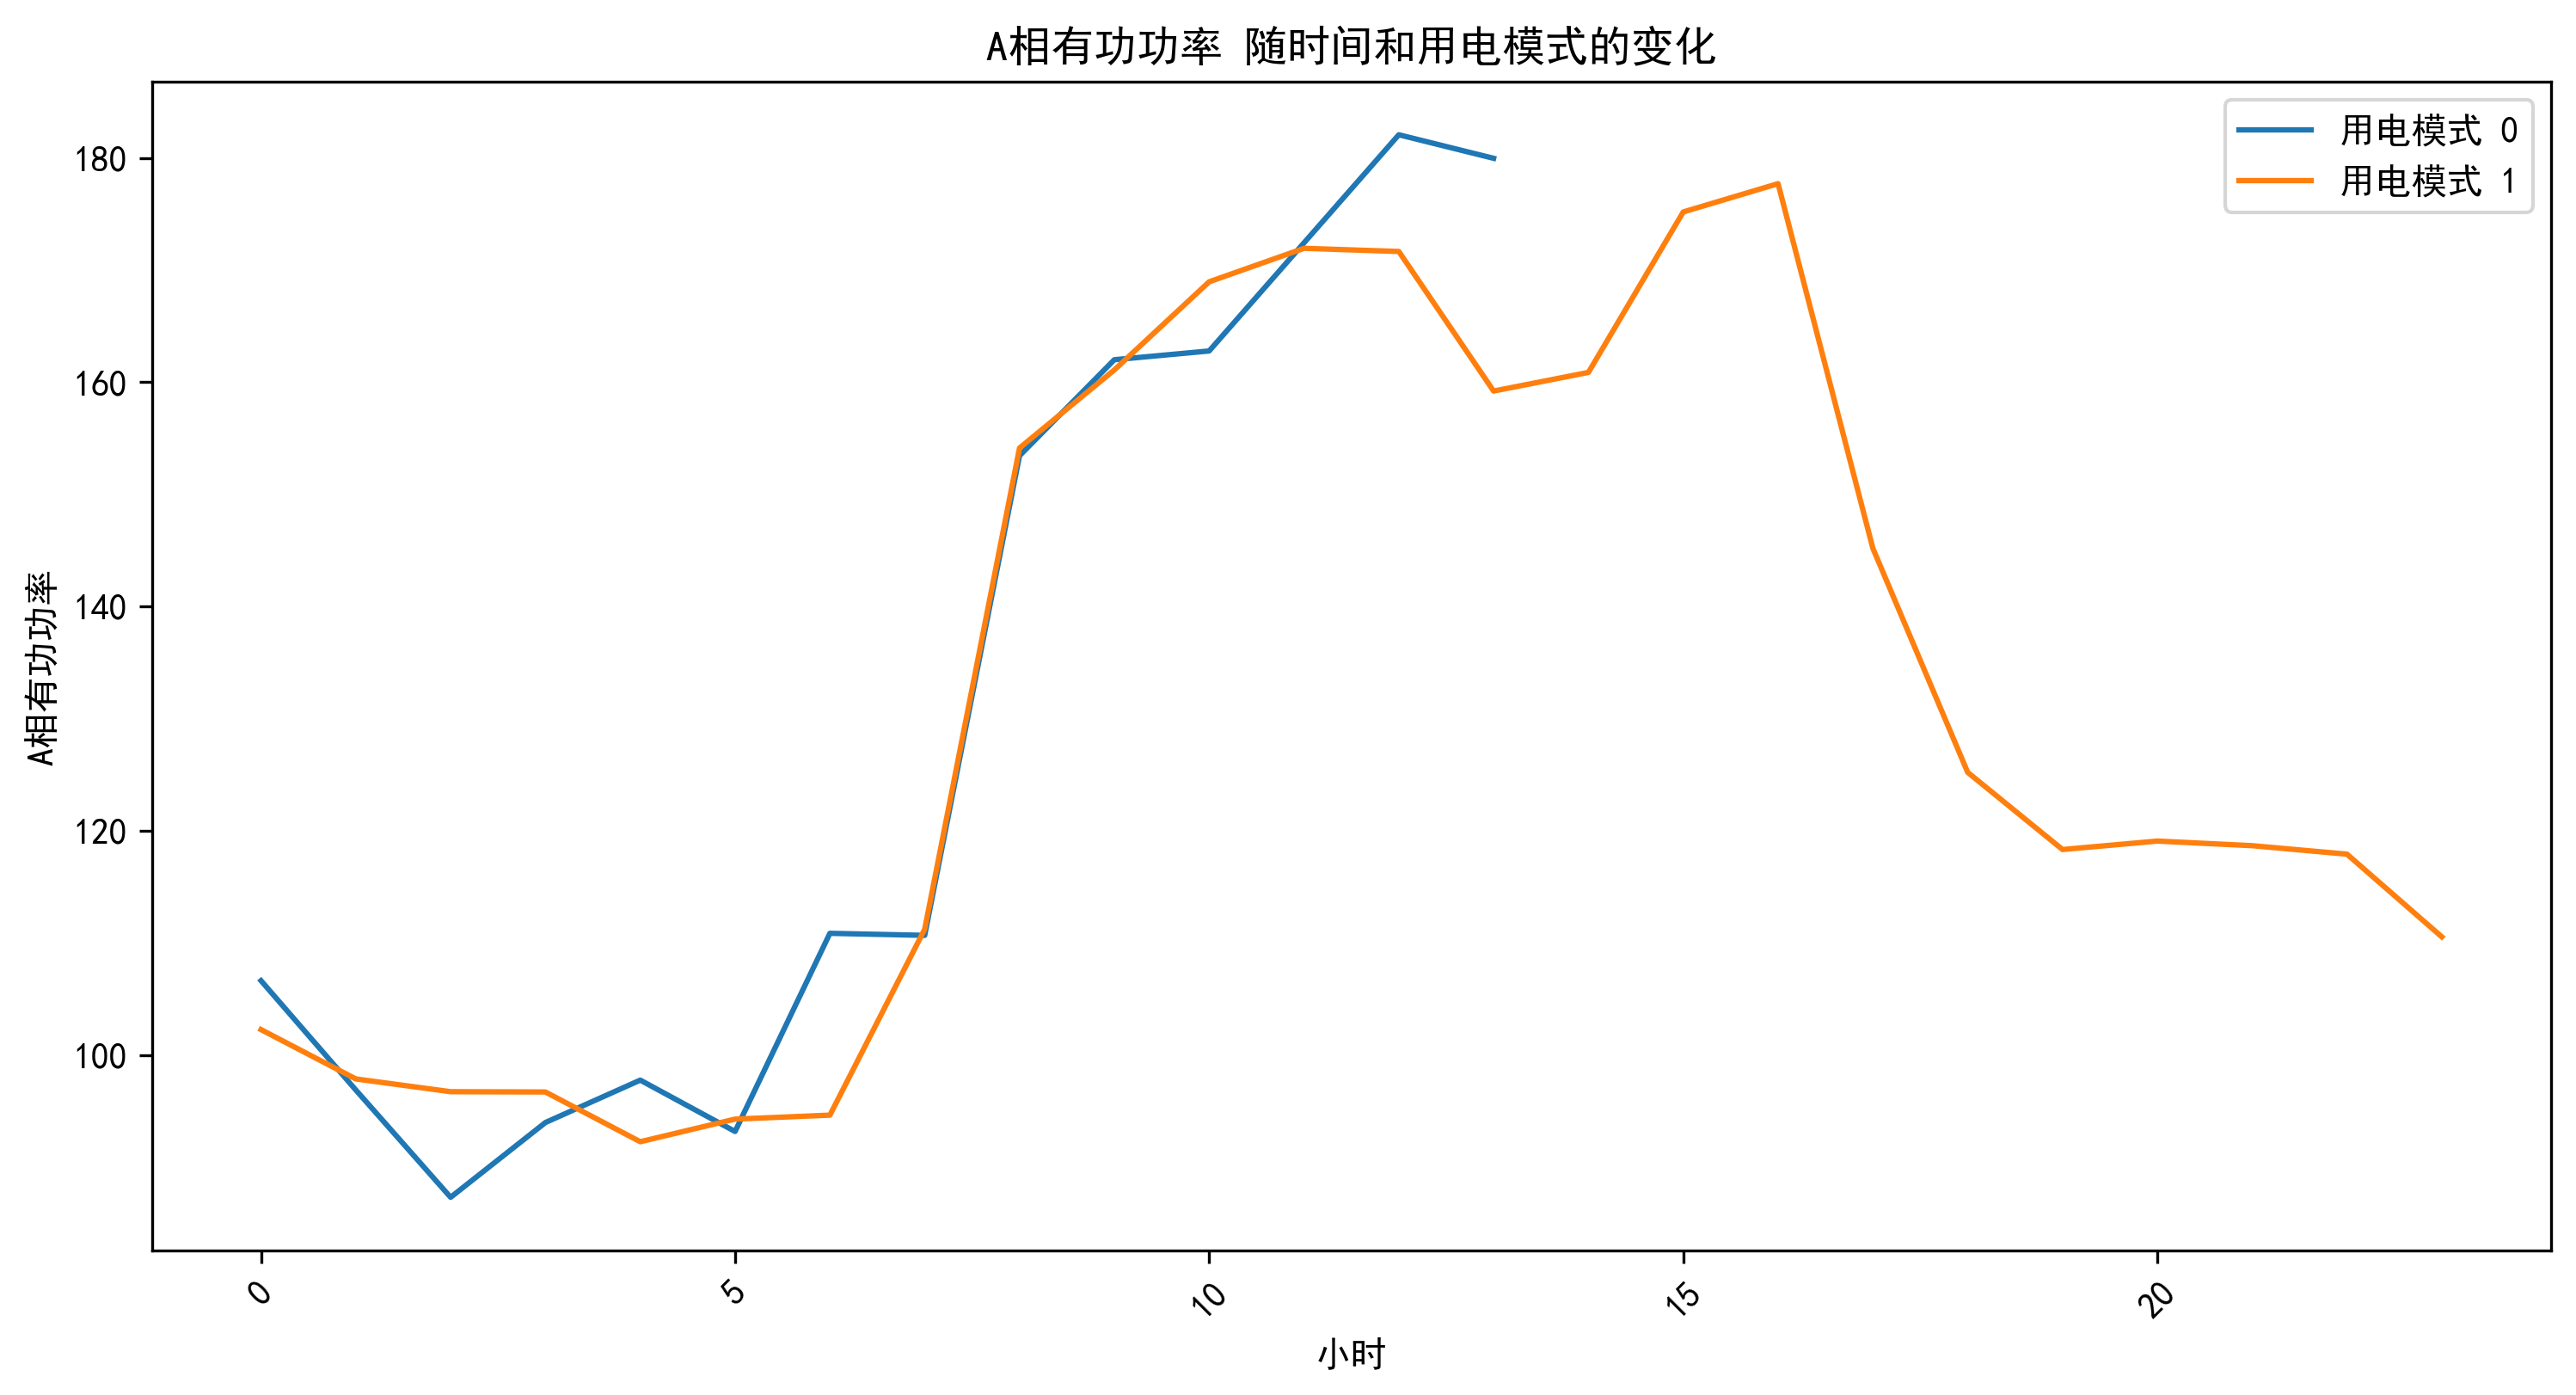

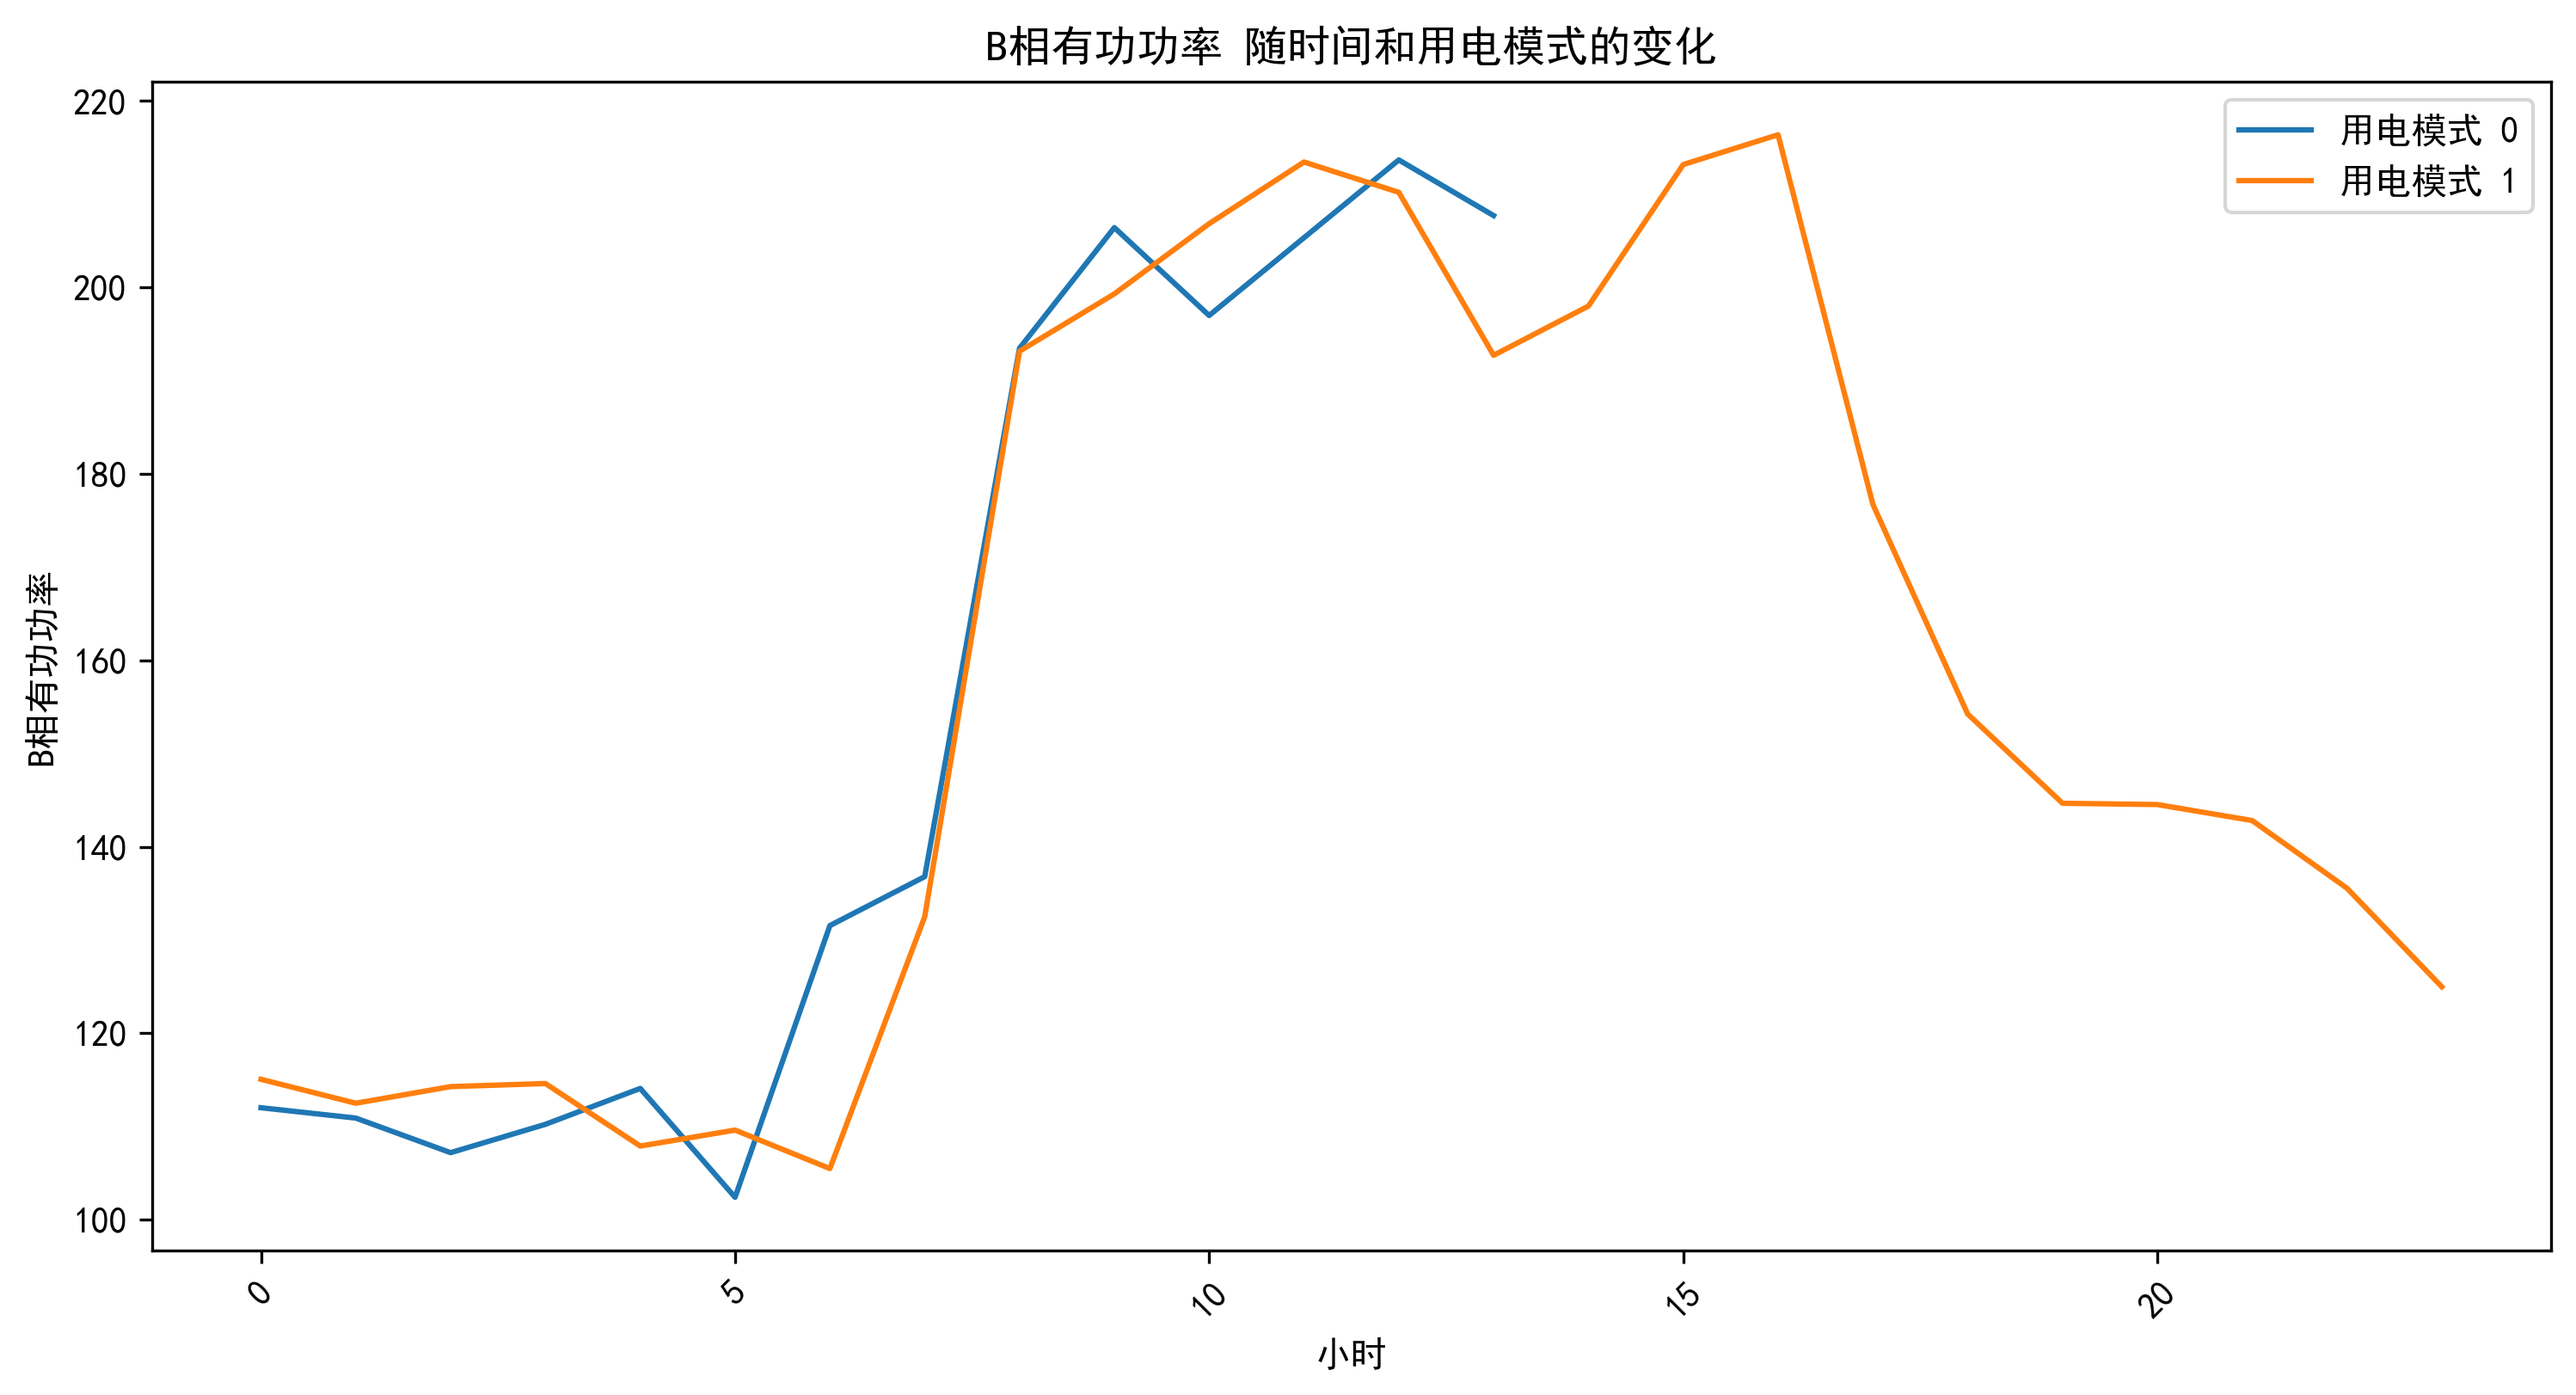

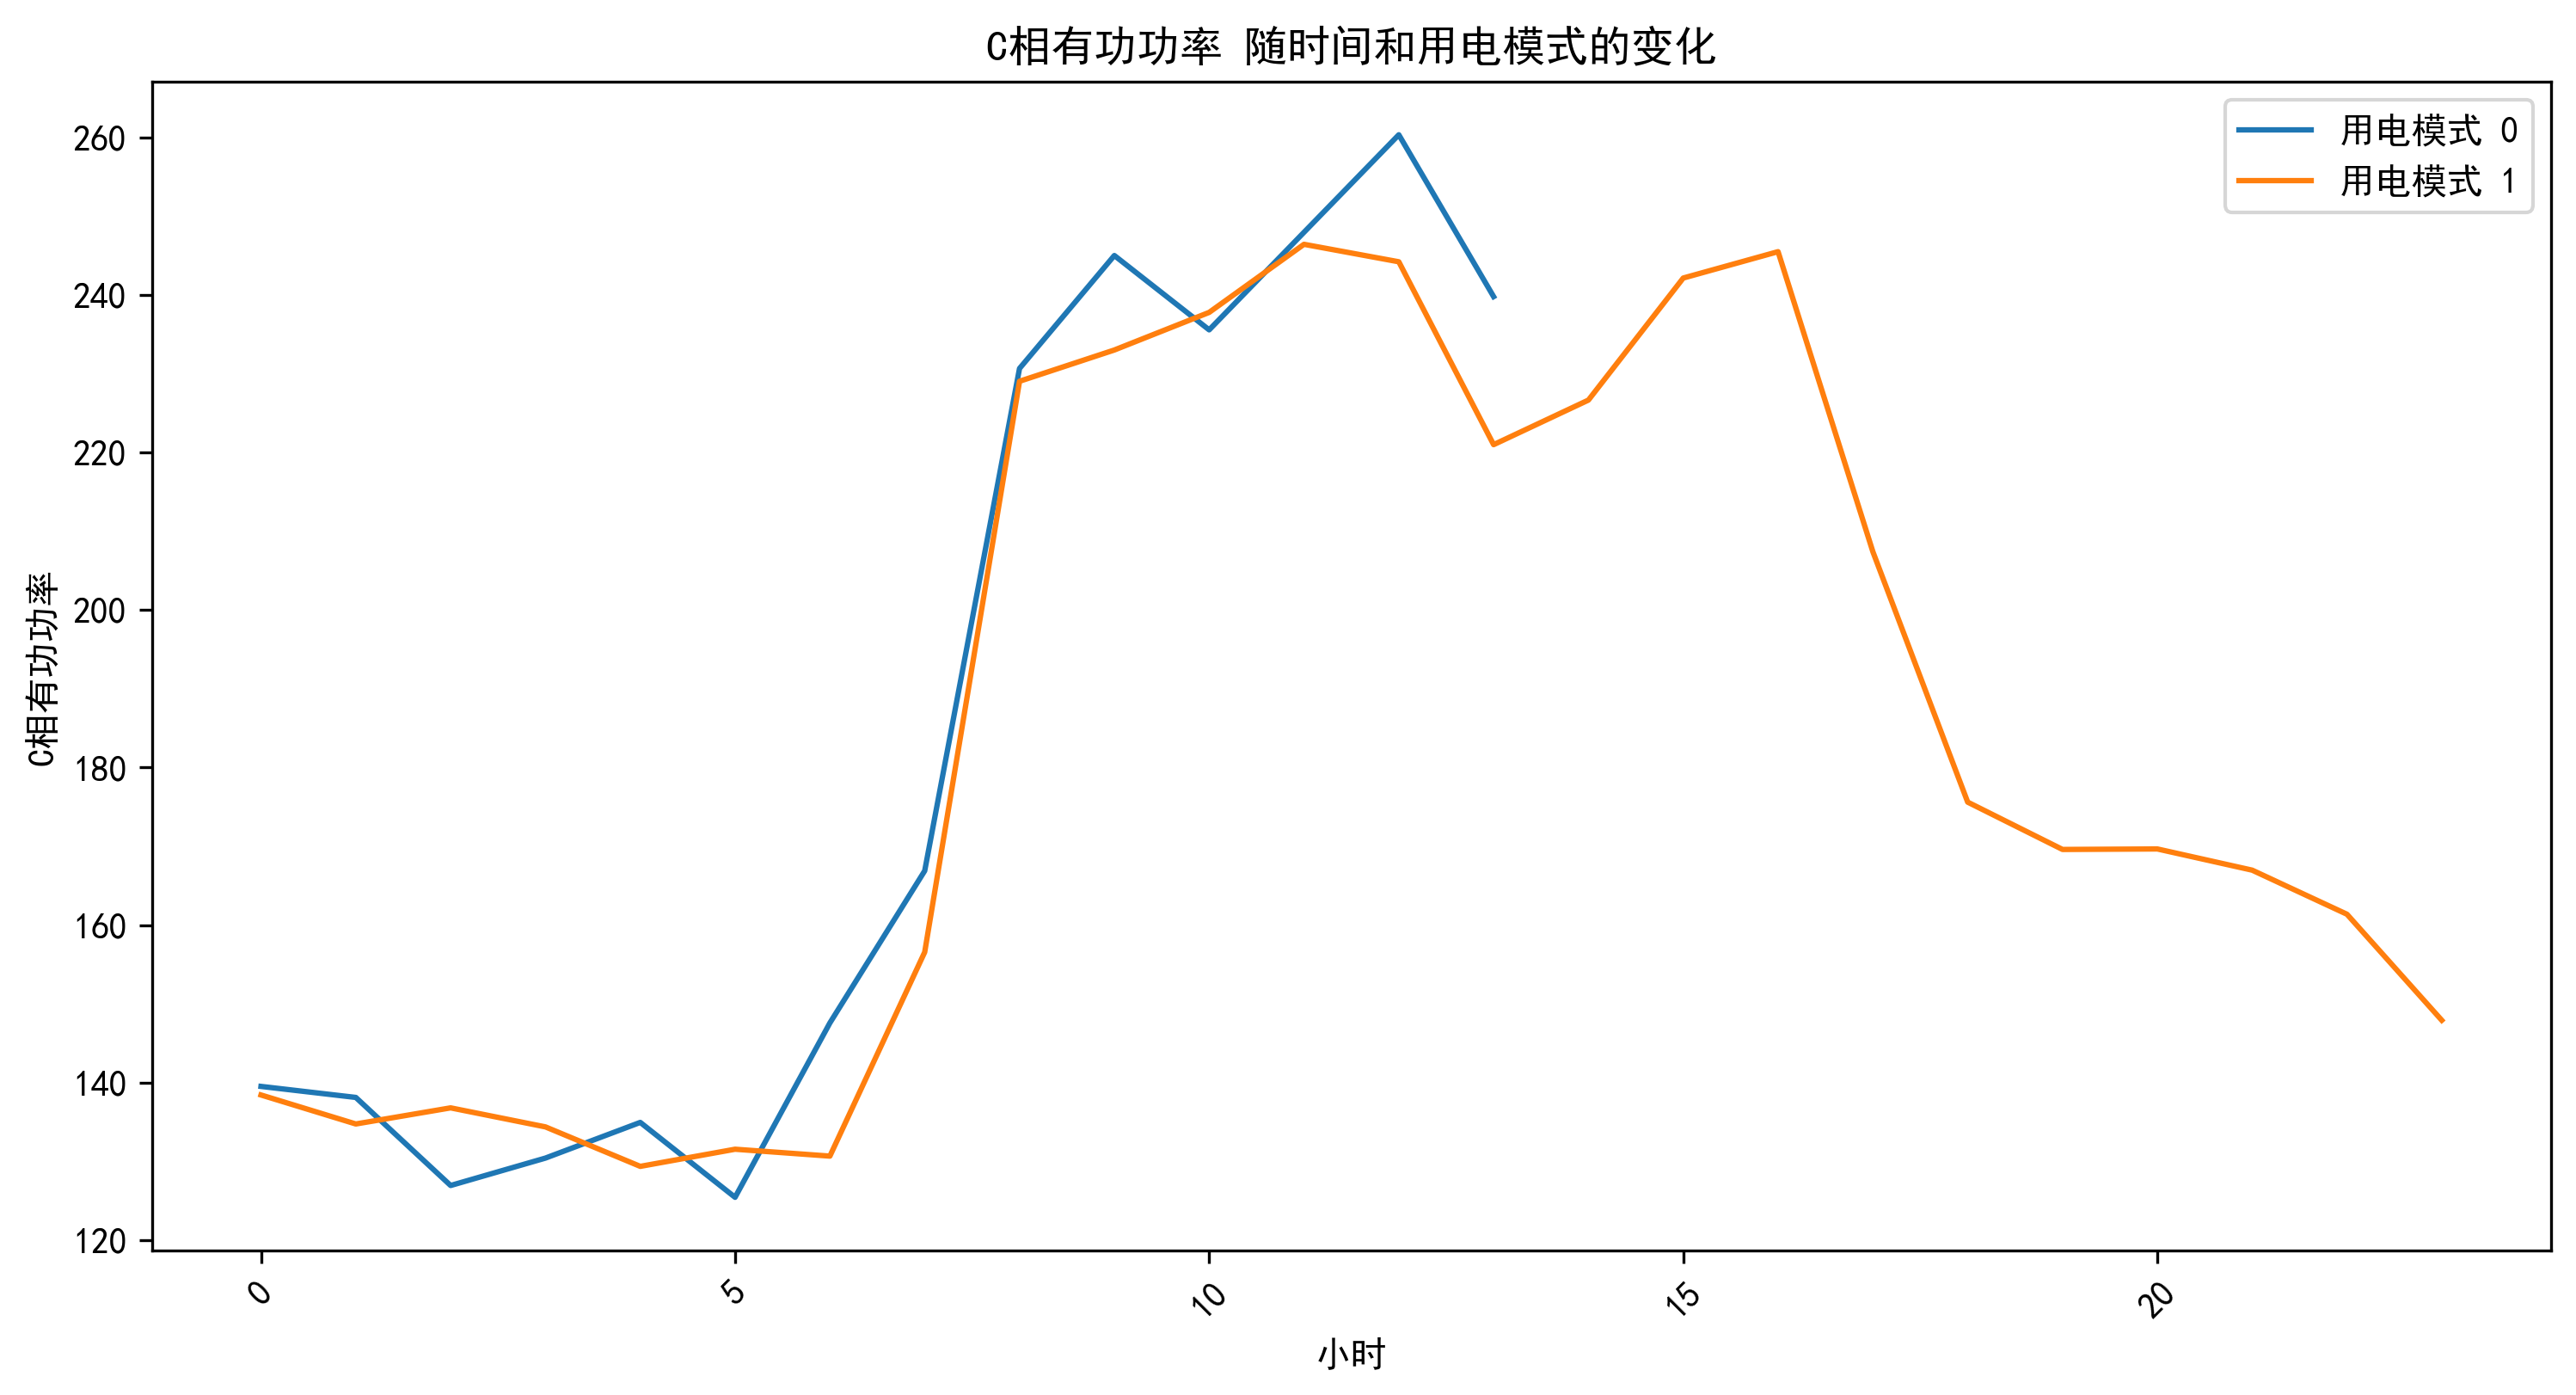

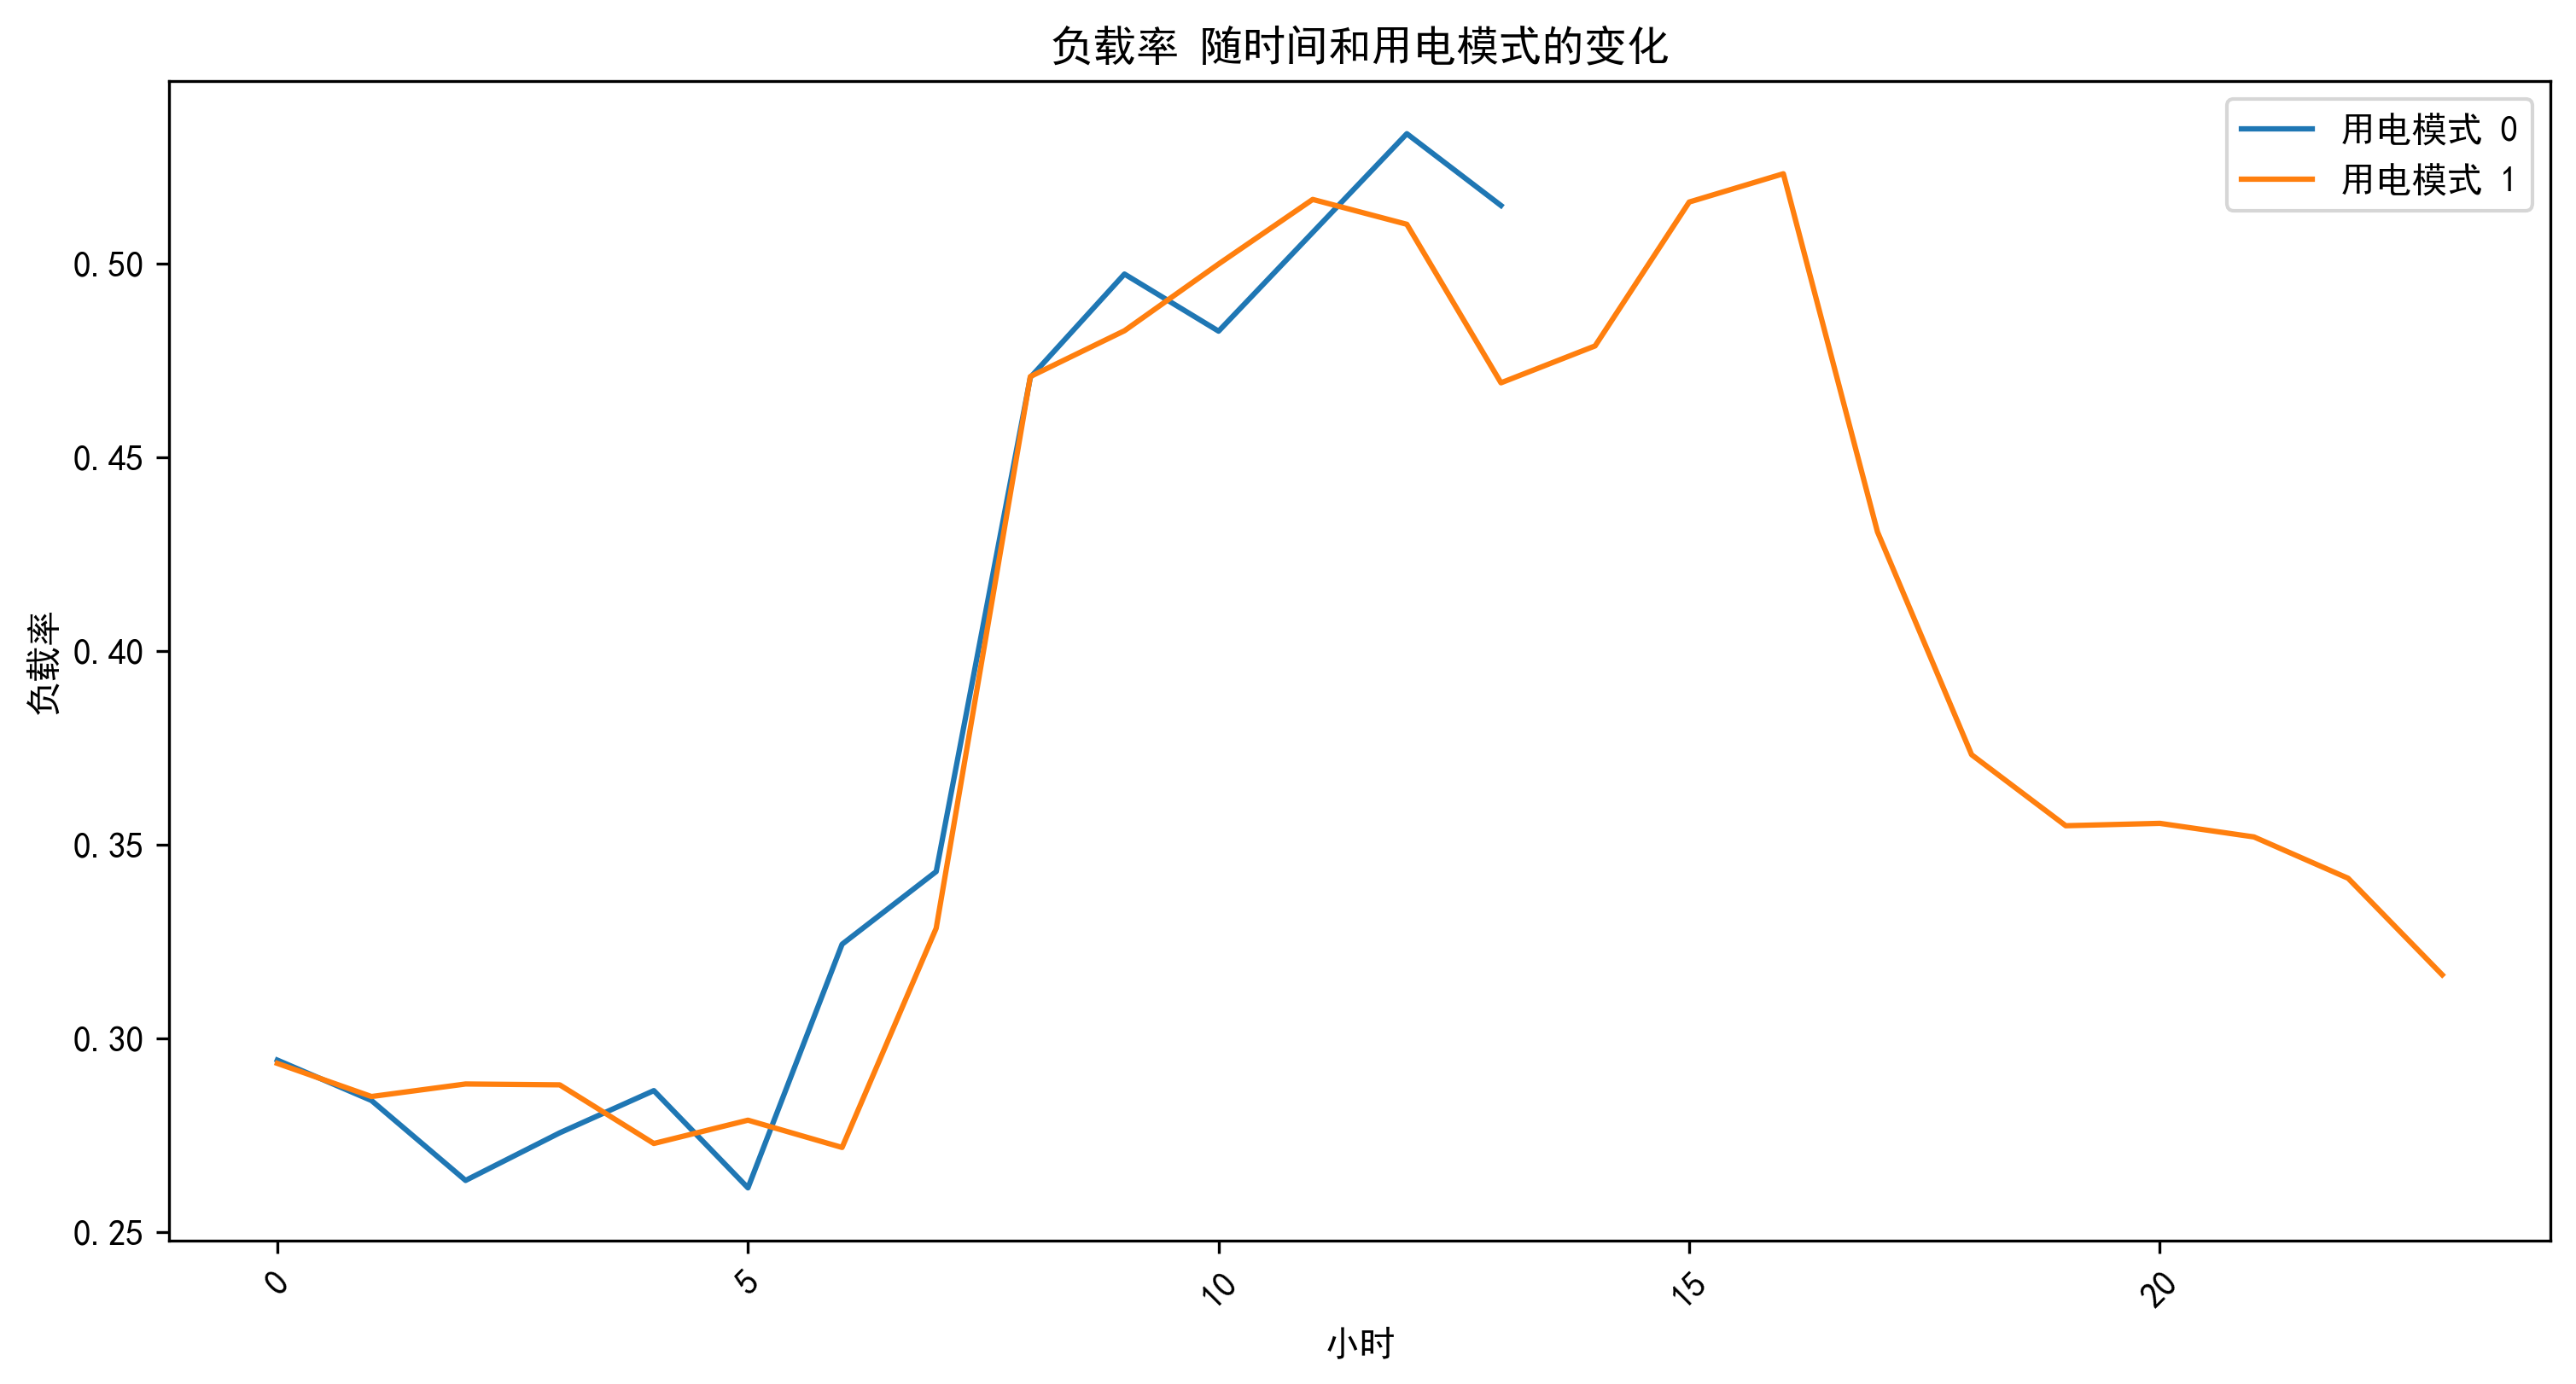

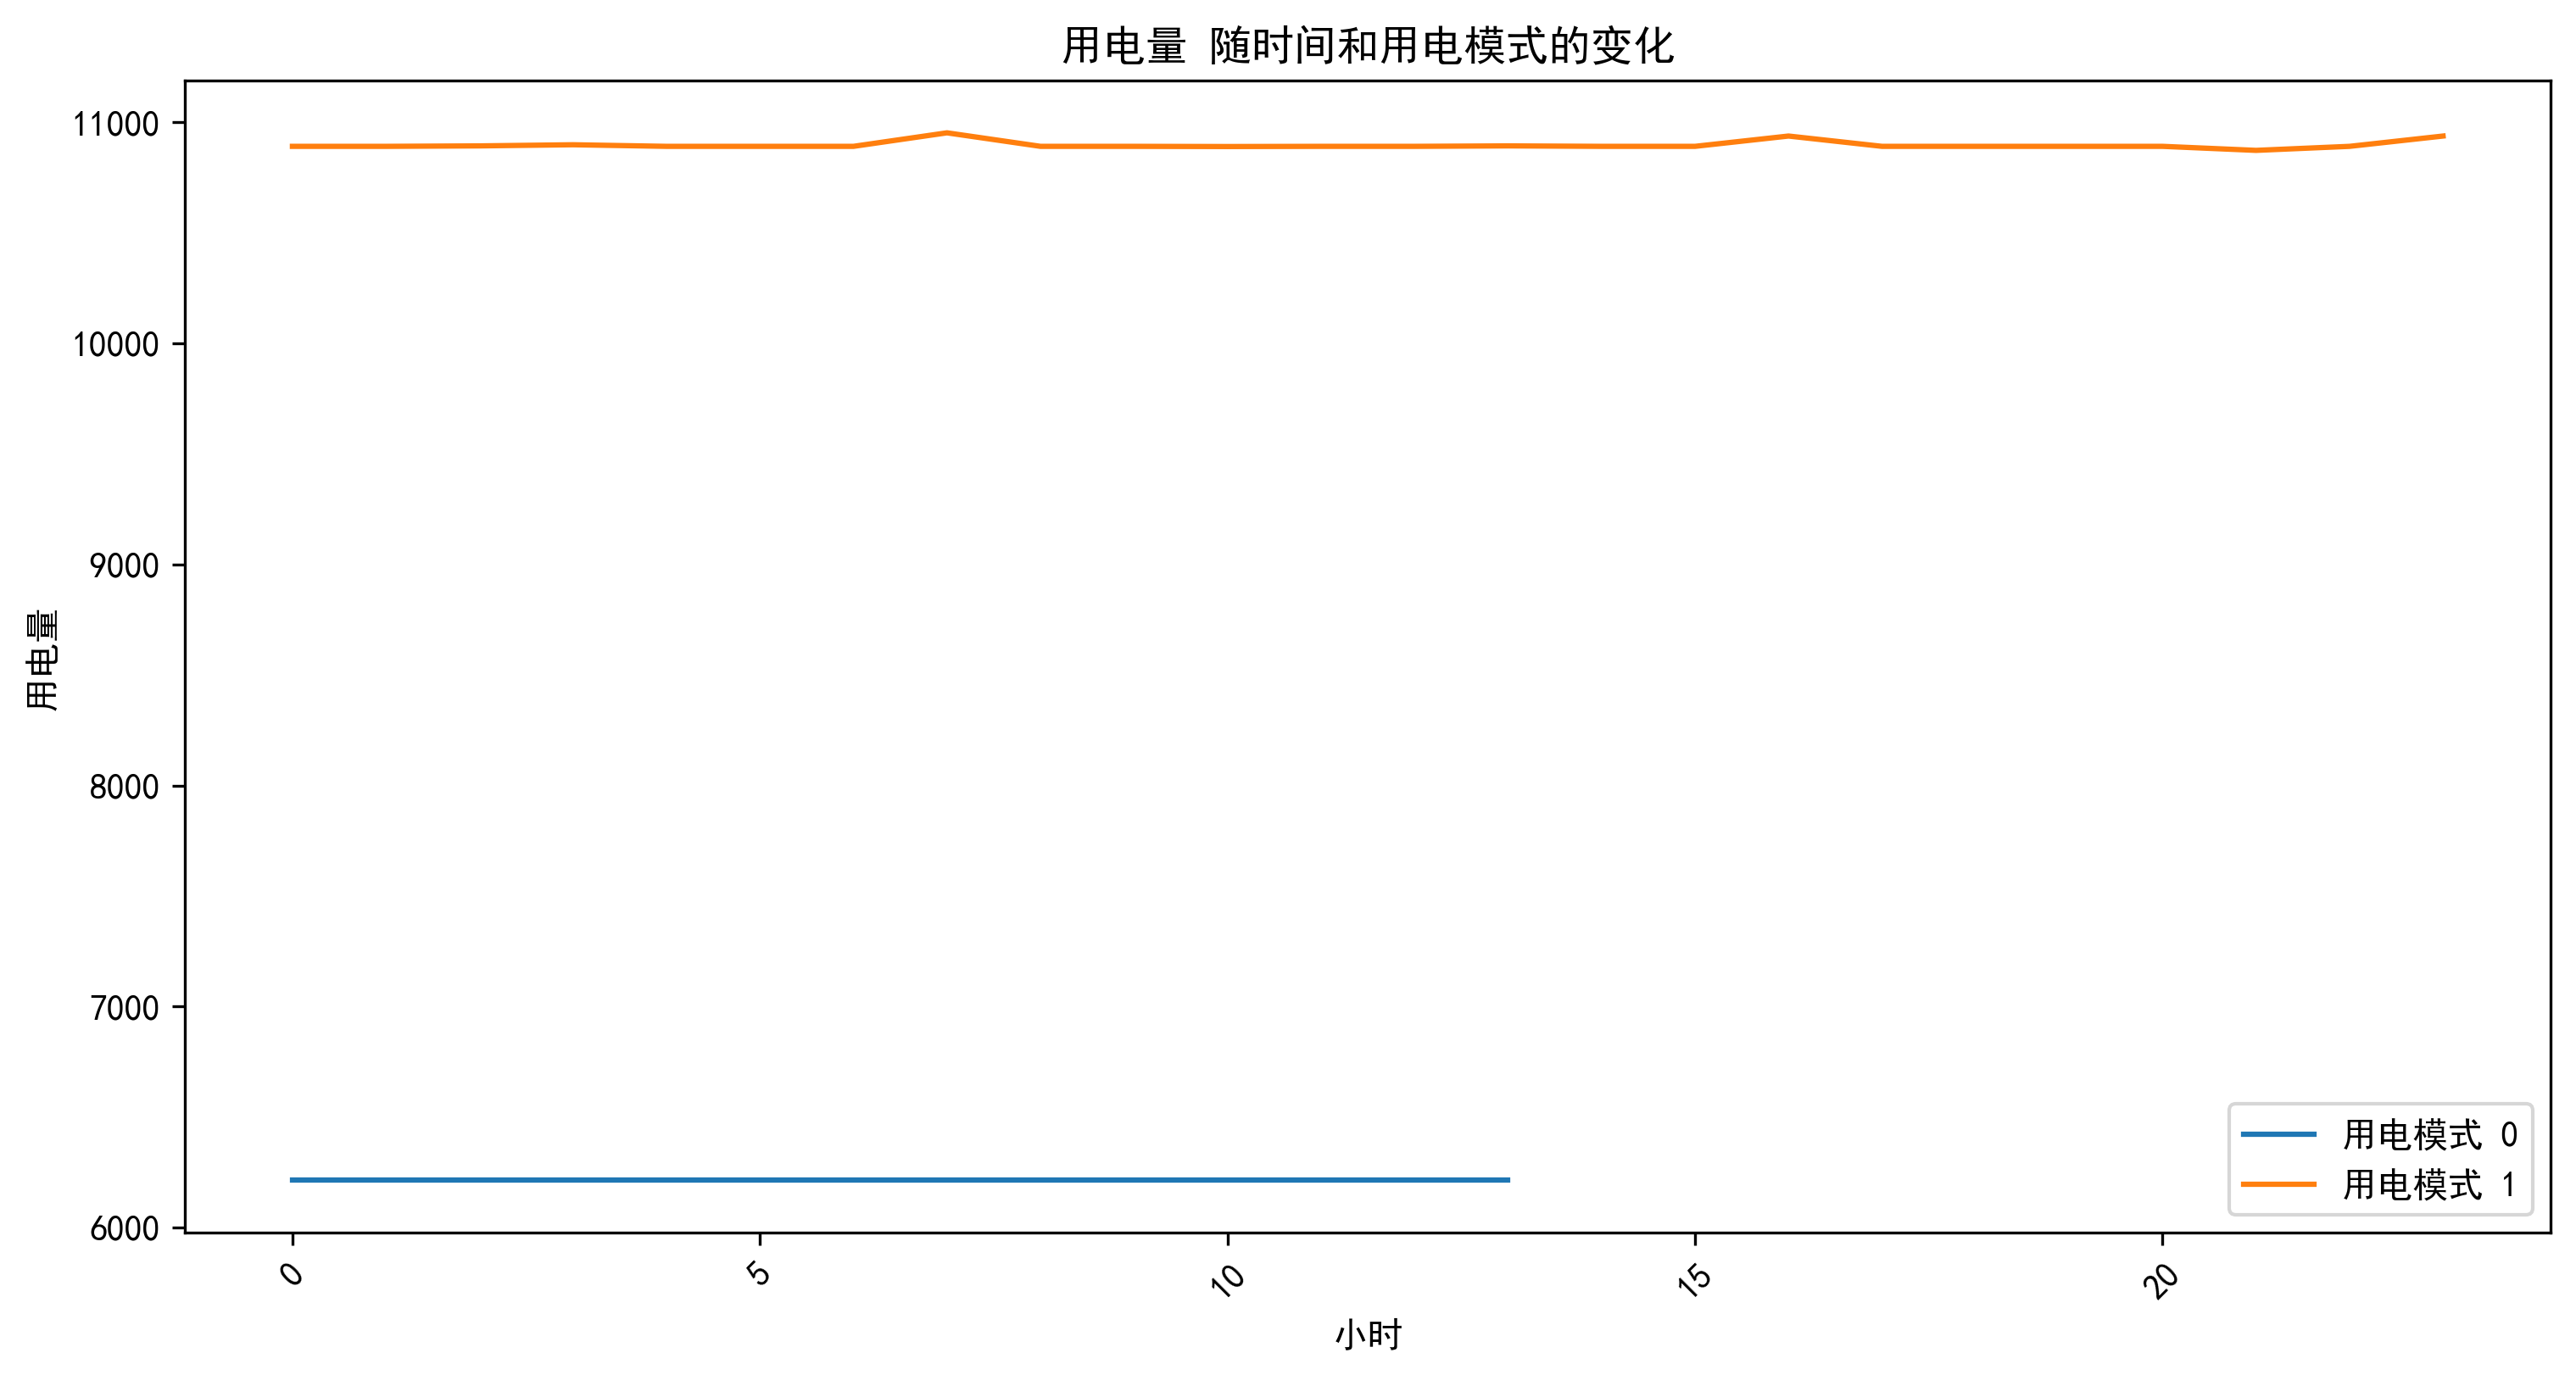

In [21]:
df['时间'] = pd.to_datetime(df['时间'])
df['小时'] = df['时间'].dt.hour

# 计算负载率
df['负载率'] = df['视在功率'] / 1250

# 计算一天内的用电量
daily_energy = df.groupby(df['时间'].dt.date).agg({'正向有功电能': lambda x: x.iloc[-1] - x.iloc[0]}).reset_index()
daily_energy.columns = ['日期', '用电量']
df = pd.merge(df, daily_energy, left_on=df['时间'].dt.date, right_on='日期', how='left')

# 选取参与聚类的特征
features = ['A相电流', 'B相电流', 'C相电流', 'A相有功功率', 'B相有功功率', 'C相有功功率', '负载率', '用电量']

# 寻找最优的簇数量
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    labels = kmeans.labels_
    score = silhouette_score(df[features], labels)
    silhouette_scores.append(score)

# 获取最优簇数量
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

# 使用最优簇数量进行 KMeans 聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['用电模式'] = kmeans.fit_predict(df[features])

# 按小时和用电模式分组计算各特征均值
hourly_pattern_mean = df.groupby(['小时', '用电模式'])[features].mean()

# 绘制折线图展示不同用电模式下各特征随时间的变化
for feature in features:
    plt.figure(figsize=(12, 6))
    for cluster in hourly_pattern_mean.index.levels[1]:
        subset = hourly_pattern_mean.xs(cluster, level=1)[feature]
        plt.plot(subset.index, subset.values, label=f'用电模式 {cluster}')
    plt.title(f'{feature} 随时间和用电模式的变化')
    plt.xlabel('小时')
    plt.xticks(rotation=45)
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [ ]:
pip install pyecharts

In [23]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
from IPython.display import HTML

# 统计不同用电模式的数量（这里将小时聚类替换为用电模式）
mode_counts = df['用电模式'].value_counts()
total = mode_counts.sum()
mode_percentages = mode_counts / total * 100

# 创建饼图来展示用电模式占比
pie = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT, width="800px", height="600px"))
    .add(
        series_name="用电模式占比",
        data_pair=[(f"用电模式 {mode}", percentage) for mode, percentage in mode_percentages.items()],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用电模式占比饼图"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
        toolbox_opts=opts.ToolboxOpts(is_show=True)
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(formatter="{b}: {c}%")
    )
)

# 渲染图表到 HTML 文件
file_path = "c:/power_usage_pie.html"
pie.render(file_path)

# 读取 HTML 文件内容
with open(file_path, "r", encoding="utf-8") as f:
    html_content = f.read()

# 使用 IPython.display.HTML 显示图表
HTML(html_content)

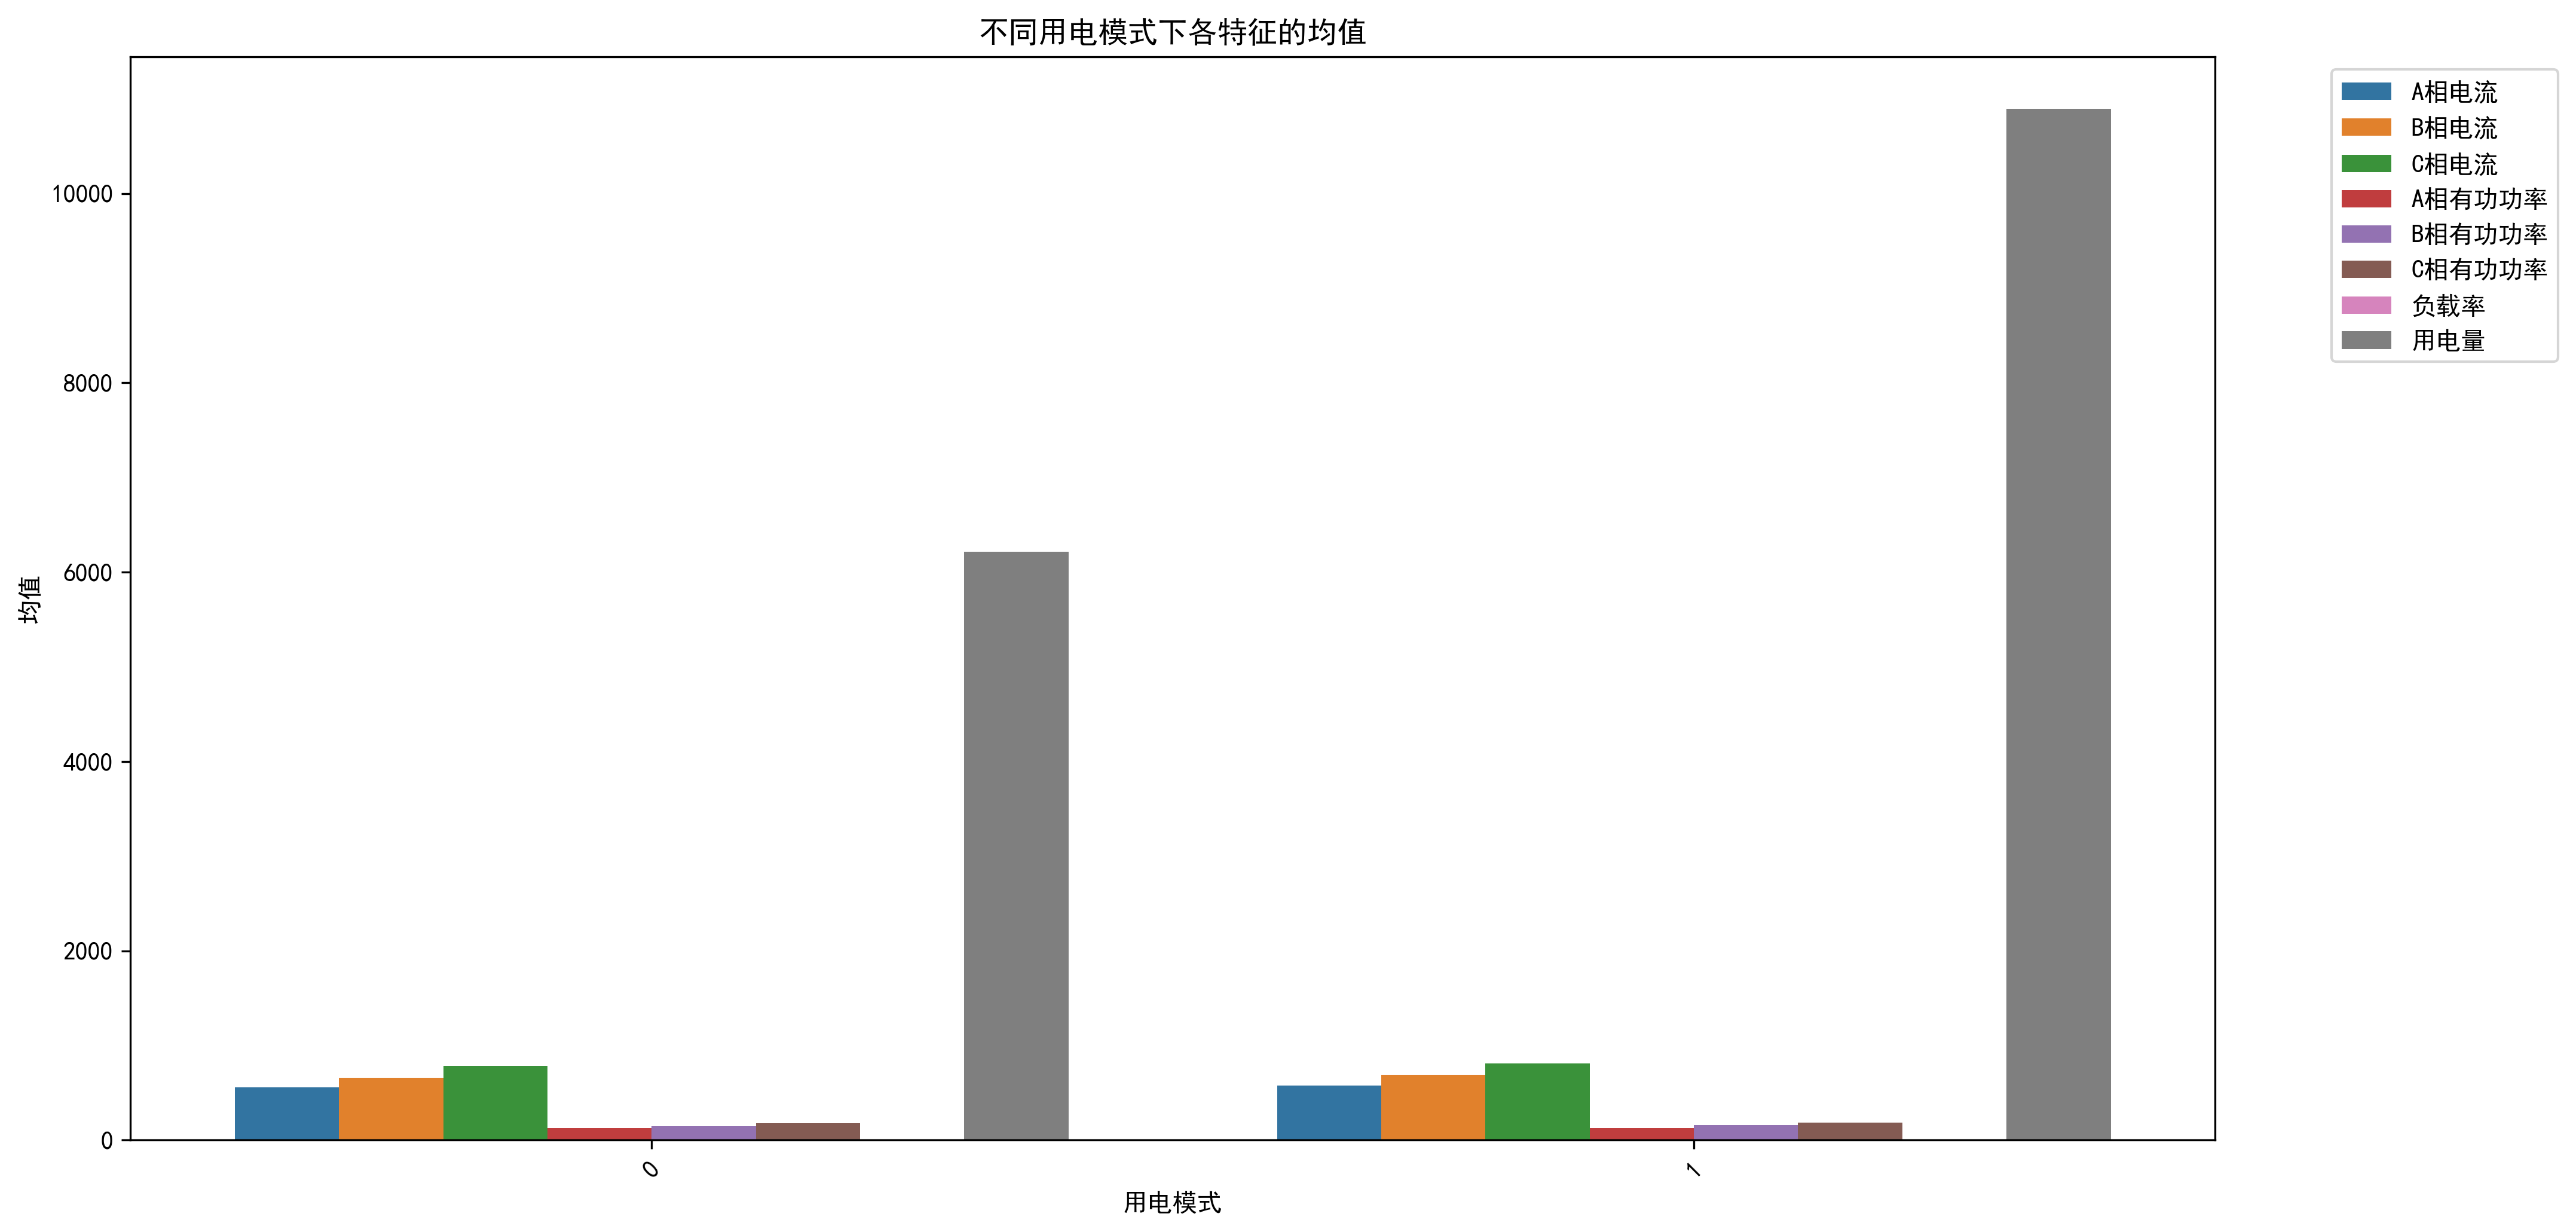

用电模式 0 特征：
A相电流       554.658462
B相电流       658.906923
C相电流       787.056154
A相有功功率     125.961538
B相有功功率     149.489231
C相有功功率     178.546923
负载率          0.371673
用电量       6215.000000
Name: 0, dtype: float64
用电模式 0 时段：[ 0  1  2  3  4  5  6  7  8  9 10 12 13]
--------------------------------------------------
用电模式 1 特征：
A相电流        576.427518
B相电流        693.262358
C相电流        808.675957
A相有功功率      130.935691
B相有功功率      157.493652
C相有功功率      184.102234
负载率           0.387567
用电量       10897.707447
Name: 1, dtype: float64
用电模式 1 时段：[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20 21 22 16 23  7]
--------------------------------------------------


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 转换时间格式并提取小时信息
df['时间'] = pd.to_datetime(df['时间'])
df['小时'] = df['时间'].dt.hour

# 计算负载率
df['负载率'] = df['视在功率'] / 1250

# 计算一天内的用电量
daily_energy = df.groupby(df['时间'].dt.date).agg({'正向有功电能': lambda x: x.iloc[-1] - x.iloc[0]}).reset_index()
daily_energy.columns = ['日期', '用电量']
df = pd.merge(df, daily_energy, left_on=df['时间'].dt.date, right_on='日期', how='left')

# 选取参与聚类的特征
features = ['A相电流', 'B相电流', 'C相电流', 'A相有功功率', 'B相有功功率', 'C相有功功率', '负载率', '用电量']

# 寻找最优的簇数量
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[features])
    labels = kmeans.labels_
    score = silhouette_score(df[features], labels)
    silhouette_scores.append(score)

# 获取最优簇数量
best_k = silhouette_scores.index(max(silhouette_scores)) + 2

# 使用最优簇数量进行 KMeans 聚类
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['用电模式'] = kmeans.fit_predict(df[features])

# 可视化不同用电模式下各特征的均值
cluster_features_mean = df.groupby('用电模式')[features].mean()
cluster_features_mean_melted = pd.melt(cluster_features_mean.reset_index(), id_vars=['用电模式'], value_vars=features)

plt.figure(figsize=(15, 8))
sns.barplot(x='用电模式', y='value', hue='variable', data=cluster_features_mean_melted)
plt.title('不同用电模式下各特征的均值')
plt.xlabel('用电模式')
plt.xticks(rotation=45)
plt.ylabel('均值')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 分析各用电模式的时段分布
for cluster in range(best_k):
    hours = df[df['用电模式'] == cluster]['小时'].unique()
    print(f'用电模式 {cluster} 特征：')
    print(cluster_features_mean.loc[cluster])
    print(f'用电模式 {cluster} 时段：{hours}')
    if all(0 <= hour < 6 for hour in hours):
        print('可能原因：夜间时段，医院处于低用电需求状态，大部分非紧急设备关闭，仅维持基本的照明、监控和生命支持设备运行。')
    elif all(6 <= hour < 12 for hour in hours):
        print('可能原因：上午时段，医院开始繁忙起来，各类医疗设备如X光机、CT机等开始运行，同时病房照明、空调等设备也在使用，用电需求上升。')
    elif all(12 <= hour < 18 for hour in hours):
        print('可能原因：下午时段，医院持续保持较高的运营状态，医疗活动继续进行，用电需求维持在较高水平。')
    elif all(18 <= hour < 24 for hour in hours):
        print('可能原因：傍晚和夜间时段，部分医疗活动减少，但病房照明、监护设备等仍在运行，用电需求较白天繁忙时段有所下降。')
    print('-' * 50)

关于用电模式 0 的时段 [0 1 2 3 4 5 6 7 8 9 10 12 13]
这表明在聚类分析中，被划分到用电模式 0 的这些小时具有相似的用电特征。从数字来看，它主要涵盖了夜间（0 - 5 时）以及上午（6 - 10 时）和部分下午（12 - 13 时）的时段。

关于用电模式 1 的时段 [0 1 2 3 4 5 6 8 9 10 11 12 13 14 15 17 18 19 20 21 22 16 23 7]
这代表被归为用电模式 1 的小时范围。几乎涵盖了一天中的大部分时段，从夜间一直到深夜。该用电模式的各项用电指标（如 A 相电流、B 相电流、用电量等）相对用电模式 0 可能整体稍高一些，负载率也达到了 0.387567。

### 用电模式 0
#### 特征：三相电流方面，A 相电流为 554.658462，B 相电流为 658.906923，C 相电流为 787.056154。三相有功功率方面，A 相有功功率是 125.961538，B 相有功功率为 149.489231，C 相有功功率为 178.546923。负载率为 0.371673，相对处于较低水平。用电量为 6215.000000。整体各项指标表明该用电模式下的用电需求处于相对不高的状态。
#### 时段：涵盖了 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13] 这些小时，主要包括夜间（0 - 5 时）、上午大部分时间（6 - 10 时）以及部分下午时段（12 - 13 时）。
#### 可能原因：夜间时段，医院处于低用电需求状态，大部分非紧急设备关闭，仅维持基本的照明、监控和生命支持设备运行。上午时段医院虽开始运营，但部分大型医疗设备尚未满负荷运行，或者部分科室的用电需求还未达到高峰，所以整体用电水平仍处于相对较低的状态。

 ————————————————————————————————————————————————————————————————————

### 用电模式 1
#### 特征：A 相电流为 576.427518，B 相电流为 693.262358，C 相电流为 808.675957，三相电流数值比用电模式 0 略高。三相有功功率方面，A 相有功功率是 130.935691，B 相有功功率为 157.493652，C 相有功功率为 184.102234，也都有所提升。负载率为 0.387567，高于用电模式 0。用电量达到 10897.707447，明显高于用电模式 0。各项指标显示该用电模式下用电需求相对较高。
#### 时段：包含 [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 16, 23, 7] 这些，几乎涵盖了一天中的大部分时段，从夜间一直持续到深夜。
#### 可能原因：全天医院都有各类医疗活动在进行，设备持续运行，并且维持基本设施运转等也需要用电。虽然不同子时段用电侧重点可能不同，但整体上都保持着一定的用电需求，所以表现出相对较高的用电水平，从而被聚类到该用电模式中。